# Исследование продаж амоибилей в Казахстане за январь-сентябоь 2019 года

Заказчик — автодилер Меркур Авто, необходимо определить рыночные сегменты Меркур Авто и разработать маркетинговый план для заказчика. 
Так же разобраться, зависит ли стоимость автомобиля от уровня развития региона (средней заработной платы по региону)

### Цель работы 

Определить рыночные сегменты Меркур Авто и разработать маркетинговый план

### Задачи

- предобработка данных

- исследовательский анализ данных

- анализ рынка автомобилей Казахствна

- анализ позиции Меркур Авто: внутреняя и внешняя среда

# Предобрааботка данных 

### 1.   Откроем таблицу и изучим информацию о данных, импортируем нужные библиотеки, считаем данные из csv-файла в датафрейм и сохраним в переменную `data`

In [1]:
import pandas as pd # загрузка библиотек
import numpy as np
from plotly import graph_objects as go
import datetime
from datetime import datetime
from scipy import stats as st
import math as mth

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore") # отключаем предупреждения

In [2]:
from IPython.display import HTML, display  # правильность отображения 
from tabulate import tabulate 
pd.set_option('display.max_columns', 30) # настраиваем опции- количество отображаемых столбцов
pd.set_option('display.float_format', '{:.2f}'.format) # количество знаков десятичных разрядов
plt.style.use('seaborn-v0_8')
sns.set_style('whitegrid') # настраиваем стили графиков

In [3]:
# загрузка датасета auto_kz_2019, устанавливаем верный разделитель, устанавливаем разделитель 
data=pd.read_csv('C://Users/Илья/Downloads/auto_kz_2019_датасет.csv',  sep = ';')

### 2. Выведем на экран первые 5 строчек датафрейма и основную информацию о нем.


In [4]:
def get_info(data):
    data.columns = [x.lower().replace(' ', '_') for x in data.columns] # переименование столбцов по правилам  snake_case
    display(data.head())# первые 5 строка датасета
    display(data.info()) # общая информация
    display(data.describe()) # описание датасета
    display("Количество пропусков в столбцах", data.isna().sum()) # подсчет пропусков в столбцах 
    display("Количество явных дубликатов", data.duplicated().sum()) # проверка явных дубликатов


In [5]:
get_info(data)

,год,месяц,компания,бренд,модель,модификация,год_выпуска,страна-производитель,вид_топлива,"объём_двиг,_л,",коробка_передач,тип_привода,сегмент,регион,наименование_дилерского_центра,тип_клиента,форма_расчета,количество,"цена,_usd","продажа,_usd",область,сегментация_2013,класс_2013,сегментация_eng,локализация_производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.00,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.00,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   год                             39966 non-null  int64  
 1   месяц                           39966 non-null  object 
 2   компания                        39966 non-null  object 
 3   бренд                           39966 non-null  object 
 4   модель                          39966 non-null  object 
 5   модификация                     36375 non-null  object 
 6   год_выпуска                     39465 non-null  object 
 7   страна-производитель            39966 non-null  object 
 8   вид_топлива                     36826 non-null  object 
 9   объём_двиг,_л,                  35708 non-null  object 
 10  коробка_передач                 36711 non-null  object 
 11  тип_привода                     35677 non-null  object 
 12  сегмент                         

None

,год,количество
count,39966.00,39960.00
mean,2019.00,1.35
std,0.00,2.37
min,2019.00,-1.00
25%,2019.00,1.00
50%,2019.00,1.00
75%,2019.00,1.00
max,2019.00,115.00


'Количество пропусков в столбцах'

год                                   0
месяц                                 0
компания                              0
бренд                                 0
модель                                0
модификация                        3591
год_выпуска                         501
страна-производитель                  0
вид_топлива                        3140
объём_двиг,_л,                     4258
коробка_передач                    3255
тип_привода                        4289
сегмент                            6761
регион                                0
наименование_дилерского_центра        0
тип_клиента                        7047
форма_расчета                     25928
количество                            6
цена,_usd                             0
продажа,_usd                          0
область                               0
сегментация_2013                      0
класс_2013                            0
сегментация_eng                       0
локализация_производства              0


'Количество явных дубликатов'

18698

#### Датасет содержит 39 966 строк и 25 колонок:

- Год – год продажи (2019)
- Месяц – месяц продажи (январь - сентябрь)
- Компания – название автоцентра
- Бренд – название продаваемой марки автомобиля
- Модель – название модели автомобиля
- Модификация – модификация модели автомобиля 
- Год выпуска – год производства автомобиля
- Страна-производитель – страна, где произведен автомобиль
- Вид топлива – бензин, дизель, электричество, гибрид
- Объём двиг л – объем двигателя автомобиля в литрах
- Коробка передач – тип коробки переключения передач 
- Тип привода – тип привода
- Сегмент – сегмент, к которому относится авто 
- Регион – регион продажи
- Наименование дилерского центра 
- Тип клиента – юридическое или физическое лицо 
- Форма расчета – наличный и безналичный расчет 
- Количество – количество автомобилей в заказе
- Цена USD – цена автомобиля -  с (цена авто умноженная на количество и за вычетом скидок если есть)
- Область – область продажи
- Сегментация 2013 – сегмент автомобиля актуальный
- Класс 2013 – класс автомобиля актуальный
- Сегментация Eng – английская сегментация 
- Локализация производства

 
#### Датасет выглядит крайне "грязным", уже после быстрого анализа можно отметить что:

- в ряде столбцов неверный формат данных, например в столбцах  цена,_usd, цена,_usd  
- в датасете содержится 18 698 дубликатов, это 46% от всего количества данных 
- во многих столбцах содержаться пропуски, их особенно много в столбцах форма расчета, тип клиента, сегмент, объем двигателя, тип привода
- в датасете 25 столбцов, нужно оценить, нужны ли  они все для дальнейшего анализа



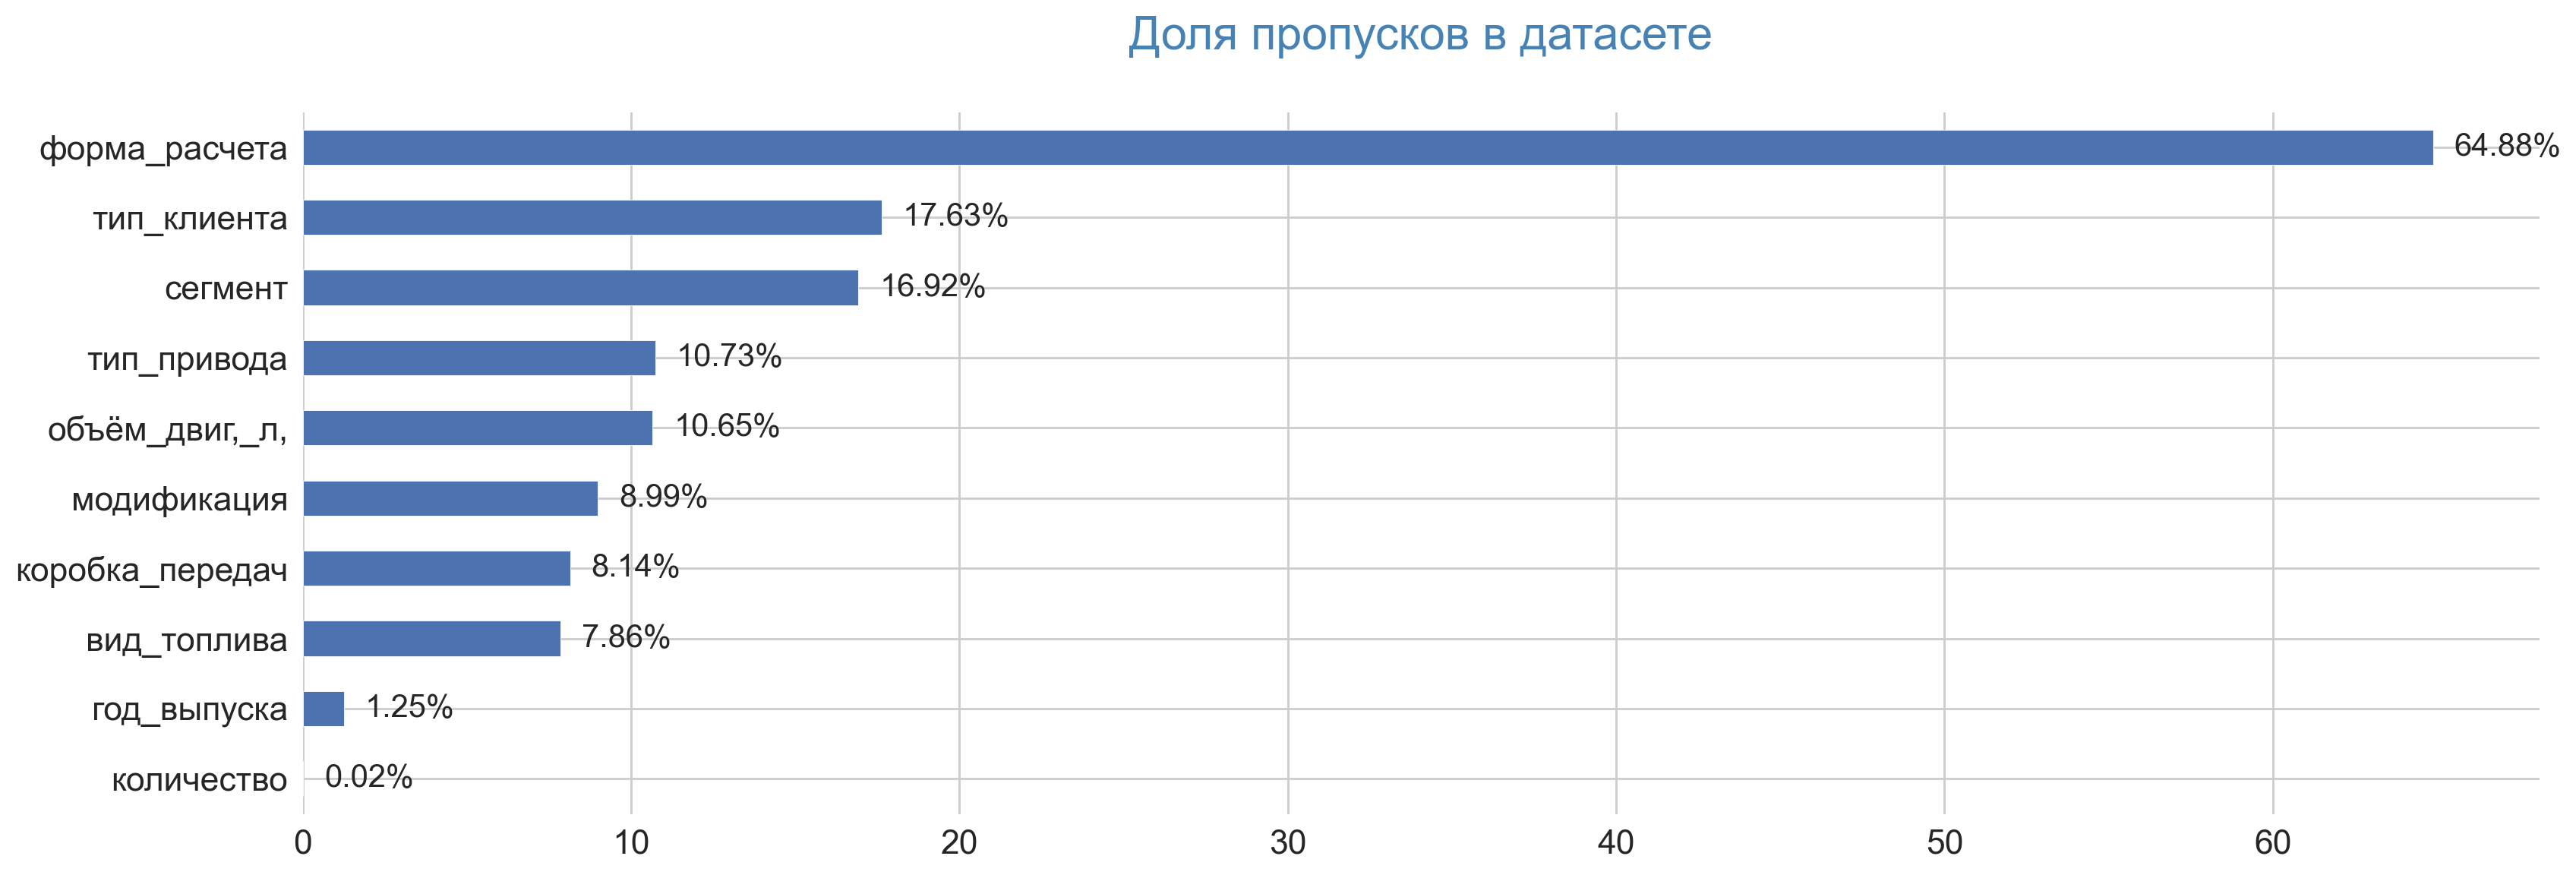

In [6]:
value=((data.isna().mean()*100)
       .to_frame()
       .rename(columns={0:'space'})
       .query('space>0')
       .sort_values(by='space',ascending=True))
ax=value.plot(kind='barh', figsize=(19,6), legend=False, fontsize=16)
ax.set_title('Доля пропусков в датасете'+"\n", fontsize=22, color='SteelBlue')
for i in range(len(value.index)):
    ax.annotate(str(round(value.loc[value.index[i], 'space'], 2))+'%',\
               xy=(value.loc[value.index[i],'space'],i),xytext=(10,0), textcoords='offset points',\
               ha='left', va='center', fontsize=15)

По разъяснению заказчика явные дубликаты в 46% данных объясняются политикой конфиденциальности и обезличивания данных, таким образом удалять их не нужно.

Чтобы качественно провести предобработку данных правильнее будет проанализировать каждый из столбцов для устранения несоответствий и аномалий

### Предобработка данных

Для удобства дальнейшей работы переименуем столбцы по-английски

In [7]:
columns_start=data.columns.tolist() # создаем список из текущих столбцов
columns_end=['year','month', 'company','brand', 'model', 'modification','release_year','manufacturing_country', 
             'fuel_type','engine_volume', 'transmission_type','drove_type', 'segment', 'region', 'dealer', 'client_type', 
             'payment_type', 'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013','class_2013', 'segment_eng', 
             'product_localization'] # создаем список новых названий колонок

change_col_dict=dict(zip(columns_start, columns_end)) #сошьем два списка в кортежи
display(change_col_dict) #проверим правильность перевода названий столбцов с русского на английский
data=data.rename(columns=change_col_dict) #переименуем столбцы

{'год': 'year',
 'месяц': 'month',
 'компания': 'company',
 'бренд': 'brand',
 'модель': 'model',
 'модификация': 'modification',
 'год_выпуска': 'release_year',
 'страна-производитель': 'manufacturing_country',
 'вид_топлива': 'fuel_type',
 'объём_двиг,_л,': 'engine_volume',
 'коробка_передач': 'transmission_type',
 'тип_привода': 'drove_type',
 'сегмент': 'segment',
 'регион': 'region',
 'наименование_дилерского_центра': 'dealer',
 'тип_клиента': 'client_type',
 'форма_расчета': 'payment_type',
 'количество': 'quantity',
 'цена,_usd': 'price_usd',
 'продажа,_usd': 'sell_price_usd',
 'область': 'state',
 'сегментация_2013': 'segment_2013',
 'класс_2013': 'class_2013',
 'сегментация_eng': 'segment_eng',
 'локализация_производства': 'product_localization'}

Напишем функцию для предобработки данных по столбцам

In [8]:
def get_column_info(column):
    unique_names = column.nunique() # подсчет уникальных значений
    missing_names = column.isna().sum() # подсчет пропусков в столбцах 
    duplicated_names = column.duplicated().sum() # проверка явных дубликатов

    introduction = f'В столбце {unique_names} уникальных значений,  {missing_names} пропусков и  {duplicated_names} дубликатов'
    display(introduction)
    display(column.unique ()) # вывод уникальных значений по столбцу


### 3. Начнем со столбцов с датами -  год, месяц, год_выпуска.

In [9]:
get_column_info(data['year'])

'В столбце 1 уникальных значений,  0 пропусков и  39965 дубликатов'

array([2019], dtype=int64)

In [10]:
get_column_info(data['month'])

'В столбце 9 уникальных значений,  0 пропусков и  39957 дубликатов'

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

В датасете представлена информация за период январь-сентябь 2019 года. Дальше для анализа нам будут нужны  данные по месяцам, поэтому переведем месяц из текстового формата в формат даты месяц-год. 

In [11]:
data['month']= data['month']. replace(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], ['2019-05-01','2019-08-01','2019-04-01','2019-07-01', '2019-02-01', '2019-06-01','2019-09-01', '2019-01-01','2019-03-01']) # переводим столбец в формат datetime

In [12]:
data['month'] = pd.to_datetime(data['month'], format='%Y/%m/%d').dt.to_period("M") # оставляем от полной даты год и месяц

In [13]:
get_column_info(data['release_year'])

'В столбце 9 уникальных значений,  501 пропусков и  39956 дубликатов'

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

В столбце год_выпуска есть скрытые пробелы "\xa", это достаточно частое явление при конвертации из excel таблиц, уберем их.

In [14]:
data['release_year'] = data['release_year'].replace(['2\xa0018', '2\xa0019'], ['2018', '2019'])

Вторая проблема столбца 'год_выпуска' - пропуски, они допущены в  501 строке  из 39966, это 1,2%  от общего числа строк. Заполнить такие пропуски невозможно, поэтому оставим данные с ними.

### 4. Предобработка столбца Компания

In [15]:
get_column_info(data['company'])

'В столбце 40 уникальных значений,  0 пропусков и  39926 дубликатов'

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

В столбце много дубликатов: 

- самая распространенная проблема - название  на русском и английском, как в случае 'Caspian Motors' и 'Каспиан Моторс'
- лишние пробелы, как в случае с 'Astana Motors', 'Astana Motors '

Исправим эти неточности

In [16]:
data['company']=data['company'].str.strip() # удаление пробелов
data['company']= data['company'].replace(['Каспиан Моторс','Автокапитал','ММС Рус','Mercur Auto','Равон Моторс Казахстан','Хино Моторс Казахстан'],
 ['Caspian Motors','Autokapital','MMC RUS','Mercur Autos','Ravon Motors Kazakstan','Hino Motors']) # на что меняем


### 5. Предобработка столбца Дилер

In [17]:
get_column_info(data['dealer'])

'В столбце 205 уникальных значений,  0 пропусков и  39761 дубликатов'

array(['Mercur Auto Алматы', 'Mercur Auto Астана',
       'Автоцентр-Бавария Астана', 'Автоцентр-Бавария Алматы',
       'Автоцентр Бавария Восток', 'ЖАЙЫК HYUNDAI MOTORS',
       'Hyundai Auto Kostanai', 'БИПЭК АВТО Костанай',
       'БИПЭК АВТО Астана', 'БИПЭК АВТО Павлодар', 'БИПЭК АВТО Алматы',
       'БИПЭК АВТО Семей', 'БИПЭК АВТО Шымкент', 'БИПЭК АВТО Актау',
       'БИПЭК АВТО Усть-Каменогорск', 'БИПЭК АВТО Атырау',
       'БИПЭК АВТО Актобе', 'БИПЭК АВТО Уральск', 'БИПЭК АВТО Караганда',
       'БИПЭК АВТО Петропавловск', 'Вираж Алматы', 'Вираж Кокшетау',
       'Вираж Уральск', 'Вираж Петропавловск', 'Вираж Павлодар',
       'Вираж Караганда', 'Вираж Астана', 'Вираж Костанай', 'Вираж Актау',
       'Вираж Усть-Каменогорск', 'Вираж Актобе', 'Вираж Атырау',
       'Вираж Шымкент', 'Вираж Семей', 'Вираж Рудный', 'Вираж Кызылорда',
       'Вираж Тараз', 'Cadillac Almaty', 'Daewoo Bus Kazakhstan',
       'Авто Сити', 'Ford Атырау', 'Меридиан АВТО Алматы', 'СемАЗ',
       'Меридиан

Столбец дилер во многом повторяет информацию столбца с названием компании, добавляя к ней название конкретного автосалона. Корректировка не требуется.

### 6. Предобработка столбца бренд

In [18]:
data['brand']=data['brand'].str.strip() # удаление пробелов
get_column_info(data['brand'])


'В столбце 46 уникальных значений,  0 пропусков и  39920 дубликатов'

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

В столбце бренд нет пропусков и дубликатов названий, корректировка не требуется.

### 7. Предобработка столбцов Модель

In [19]:
data['model']=data['model'].str.strip() # удаление пробелов
get_column_info(data['model'])

'В столбце 273 уникальных значений,  0 пропусков и  39693 дубликатов'

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '3 серия', '5 серия',
       '6 серия', '7 серия', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z4',
       'Aveo', 'Captiva', 'Niva', 'Tahoe', 'Tracker', 'BS 106 A',
       'Fiesta', 'Mondeo', 'BJ3253DMPKB-AD', '2217', '2310', '2705',
       '2752', '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Santa Fe', 'Sonata', 'TQ-1/H-1', 'County', 'H350',
       'HD 160', 'HD 170', 'HD 65', 'HD 78', 'Universe', 'Tucson', 'Q50',
       'QX50', 'QX60', 'QX80', 'D-MAX', 'NMR', 'NPR', 'Daily', 'Daily A',
       'Daily V', 'Stralis', 'Tipper', 'S3', 'S5', 'F-Pace', 'F-Type',
       'XE', 'XF', 'XJ', '4308', '4311', '43118', '43253', '43502',
       '44108', '45142', '45143', '53215', '53504', '53605', '54115',
       '5490', '65111', '65115', '65116', '65117', '6520', '65206',
       '65225', '66052', '6606', 'Cerato', 'Optima', 'Picanto', 'Quoris',
       'Rio', 'Sorento', 'Soul', 'Sportage', '4x4', 'Granta', 'Kalina',
       '

В столбце модель нет пропусков, число уникальных моделей  - 273, некоторые из них выглядят как числа или сочетания чисел и букв, проверим несколько из них

In [20]:
data.query("model=='2310' or model=='ZK6108HGH' ").sample(3)

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drove_type,segment,region,dealer,client_type,payment_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,segment_eng,product_localization
874,2019,2019-01,Вираж,GAZ,2310,GAZ 231073-0305-96-000-73-00-059 соболь,2018,Российская Федерация,Дизель,"2,8",Мех.,Полный,NaN,Кокшетау,Вираж Кокшетау,Физ. Лицо,NaN,1.00,"11715,40134","11715,40134",Акмолинская область,Коммерческие автомобили,Малотоннажные грузовики,N,Импорт
39866,2019,2019-07,Allur Auto,Yutong,ZK6108HGH,Bus,2019,Республика Казахстан,Дизель,"6,7L",MT,2WD,автобус,Костанай,Allur Auto Almaty,Юр. Лицо,безналичный,1.00,"91979,00697","91979,00697",Костанайская область,Коммерческие автомобили,Средние автобусы,O,Локальное производство
39892,2019,2019-09,Allur Auto,Yutong,ZK6108HGH,"Diesel 10,3 m",2019,Республика Казахстан,Дизель,"6,5",MT,2WD,автобус,Костанай,Allur Auto Almaty,Юр. Лицо,Безналичная,1.00,"98175,23246","98175,23246",Костанайская область,Коммерческие автомобили,Средние автобусы,O,Локальное производство


Названия моделей состоящие из чисел или сочетания чисел и букв характерны для таких марок как GAZ и Yutong, ошибки в данных нет

### 8. Предобработка столбцов Модификация

In [21]:
data['modification']=data['modification'].str.strip() # удаление пробелов
get_column_info(data['modification'])

'В столбце 1350 уникальных значений,  3591 пропусков и  38615 дубликатов'

array(['TFSI', 'TFSI Allroad', 'A8L TFSI', ..., 'B3P2M3TX5C', 'V90CC Pro',
       'KAMAZ 58815Z'], dtype=object)

Столбец с названиями модификаций содержит 1350 уникальных значения и 3591 пропусков. Такое большое количество модификаций только утяжелит анализ и сделает его трудночитаемым для пользователя, позднее его можно удалить.

### 9. Предобработка столбцов Страна производства

In [22]:
data['manufacturing_country']=data['manufacturing_country'].str.strip() # удаление пробелов
get_column_info(data['manufacturing_country'])

'В столбце 19 уникальных значений,  0 пропусков и  39947 дубликатов'

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

В столбце страна производства нет пропусков и неявных дубликатов, корректировка не нужна

### 10. Предобработка столбцов Сегментация 2013

In [23]:
get_column_info(data['segment_2013'])

'В столбце 5 уникальных значений,  0 пропусков и  39961 дубликатов'

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

В столбце  сегмент нет пропусков и неявных дубликатов, корректировка не нужна

### 11. Предобработка столбцов Класс 2013

In [24]:
data['class_2013']=data['class_2013'].str.strip() # удаление пробелов
get_column_info(data['class_2013'])

'В столбце 21 уникальных значений,  0 пропусков и  39945 дубликатов'

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

В столбце класс_2013 нет пропусков и неявных дубликатов, корректировка не нужна

### 12. Предобработка столбцов Сегментация Eng

In [25]:
data['segment_eng']=data['segment_eng'].str.strip() # удаление пробелов
get_column_info(data['segment_eng'])

'В столбце 16 уникальных значений,  0 пропусков и  39950 дубликатов'

array(['C', 'D', 'E', 'F', 'K2', 'K3', 'G2', 'K1', 'B', 'O', 'L1', 'N',
       'M', 'L2', 'K4', 'A'], dtype=object)

В столбце сегмент_англ нет пропусков и неявных дубликатов, как пояснил заказчик это устаревшая сегментация, столбец с ней можно будет удалить.

### 13. Предобработка столбцов Локализация производства

In [26]:
data['product_localization']=data['product_localization'].str.strip() # удаление пробелов
get_column_info(data['product_localization'])


'В столбце 2 уникальных значений,  0 пропусков и  39964 дубликатов'

array(['Импорт', 'Локальное производство'], dtype=object)

В столбце страна-призводитель нет пропусков и неявных дубликатов, фактически в ней повторяется информация из столбца со страной-производителем - столбец можно удалить

### 14. Предобработка столбцов Сегмент

In [27]:
data['segment']=data['segment'].str.strip() # удаление пробелов
get_column_info(data['segment'])

'В столбце 101 уникальных значений,  6761 пропусков и  39864 дубликатов'

array(['Легковые автомобили Premium', 'Внедорожники Premium', nan,
       'Легковые автомобили', 'B класс', 'Среднеразмерные SUV',
       'Внедорожники', 'Полноразмерные SUV', 'Субкомпактные SUV', 'салон',
       'B', 'B-SUV', 'C-SUV', 'C', 'D-SUV', 'D', 'MPV', 'LCV',
       'городской', 'малотоннажные', '16+1', 'VAN', 'Ambulance', 'Шасси',
       'Крупнотоннажные', 'среднетоннажные',
       'Промтоварный фургон 4600*2200*2200*40', 'Изотермический фургон',
       'Изотермический фургон 4600*2200*2200',
       'Промтоварный фургон Т25 с б.д.', 'борт', 'Промтоварный фургон',
       'Промтоварный фургон 4600*2200*2200*25',
       'Бортовая платформа с тентом',
       'Изотермический фургон с холодильным оборудованием',
       'Промтоварный фургон Т40', 'Изотермический фургон 5200*2200*2200*',
       'Борт 5200*2200*400', 'Промтоварный фургон Т40 с б.д.',
       'туристический', '43+1', 'Легковой автомобиль', 'внедорожник',
       'пикап', 'коммерческий транспорт', 'коммерческие',
       '

Столбец  сегмент содержит устаревшую  систему сегментации, его можно удалить

#### 15. Предобработка столбца объем двигателя

In [28]:
data['engine_volume']=data['engine_volume'].str.strip() # удаление пробелов 

get_column_info(data['engine_volume'])

'В столбце 113 уникальных значений,  4258 пропусков и  39852 дубликатов'

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2', '1,485',
       'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G',
       '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9',
       '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,',
       '6,7L', 

Столбец объем двигалтеля выглядит очень грязным, в том числе:

- в части значений разделитель-запятая вместо точки
- есть буквы вместо значений в литрах (МТ, АТ)
- вместо объема двигателя указана мощность в лошадиных силах и киловатт-часах(88 KWH,400 Л.С. )
- есть значения объема двигателей более 10 литров
- в датасете 39 852 пропуска в строках объема двигателя

Для начала заменим разделитель с запятой на точку, заменим значения в неверном формате на лошадиных сил и киловатт-часов на значения 2 и 0.

In [29]:
data.engine_volume = data.engine_volume.str.replace(',', '.') #замена запятой на точку
data.loc[data.engine_volume == '400 Л.С.', 'engine_volume'] = 2 # замена лошадиных сил на объем двигателя
data.loc[data.engine_volume == '88 KWH', 'engine_volume'] = 0 #замена киловатт на 1 - это "заглушка" для электродвигателя
data['engine_volume']=data['engine_volume'].replace('#Н/Д', np.NaN) # заменим  '#Н/Д' на NaN

Теперь отберем строки со значение МТ и АТ в объеме двигателя

In [30]:
to_change=data.query("engine_volume=='MT' or engine_volume=='AT'")
display(to_change.sample(5))
len(to_change) # количество строк в датасете

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drove_type,segment,region,dealer,client_type,payment_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,segment_eng,product_localization
23732,2019,2019-01,Renault Россия,Renault,Duster,E1FB4AG,2018,Российская Федерация,2,MT,4WD,4WD,0,Караганда,Кристалл Авто Караганда,NaN,NaN,1.00,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23761,2019,2019-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,0,Костанай,Автоцентр Астэк,NaN,NaN,1.00,"12249,61125","12249,61125",Костанайская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23750,2019,2019-01,Renault Россия,Renault,Duster,E1FB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,0,Шымкент,БИПЭК АВТО Шымкент,NaN,NaN,1.00,"12249,61125","12249,61125",Южно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23731,2019,2019-01,Renault Россия,Renault,Duster,E1FB4AG,2018,Российская Федерация,2,MT,4WD,4WD,0,Караганда,Кристалл Авто Караганда,NaN,NaN,1.00,"12249,61125","12249,61125",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт
23723,2019,2019-01,Renault Россия,Renault,Duster,E2GB4AG,2019,Российская Федерация,2,MT,4WD,4WD,0,Уральск,Урал-Кров Авто,NaN,NaN,1.00,"12249,61125","12249,61125",Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт


34

В датасете всего 34 столбца с такой проблемой, можно заметить, что столбцы объем двигателя и коробка передач, поменяем столбцы местами.

In [31]:
to_change['transmission_type']=to_change['engine_volume']
to_change['engine_volume']=to_change['fuel_type']
to_change['fuel_type']=np.NaN

Теперь нужно в основном датасете заменить скоррестированные строки. Для этого оставим в основном датасете только строки без значений МТ и АТ в объеме двигателя и добавим к нему строки из датасета to_change

In [32]:
data_cleared=data.query("engine_volume!='MT' and engine_volume!='AT'") # оставим в основном датасете только строки без значений МТ и АТ в объеме двигателя


In [33]:
data = pd.concat([to_change, data_cleared]) #объеденим датасеты
data.reset_index(drop= True , inplace= True )
data.shape # проверяем корректность слияния

(39966, 25)

Количество строк и столбцов осталось прежним. Создадим функцию для окончательной очистки столбца объем двигателя

In [34]:
def engine_cleaner(cell):
    'функция для удаления лишних символов из столбца объем двигателя'
    good_symbols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.'] # список символов, которые мы оставляем
    new_cell = '' # новая пустая строка куда мы будем добавлять "хорошие" символы
    for element in cell:
        if element in good_symbols:
            new_cell += element
    if new_cell.endswith('.'): # отдельно обработаем момент где в конце остается точка
        new_cell = new_cell[:-1]
    return new_cell

In [35]:

data.engine_volume = data.engine_volume.astype('str') # для корректной работы функции приведем столбец к типу строка

In [36]:

data.engine_volume = data.engine_volume.apply(engine_cleaner) # применяем функцию

Заменим пропуски на NaN и проверим, как столбец выглядит после очиистки.

In [37]:
data.engine_volume = data.engine_volume.replace('', np.NaN) # меняем пустые значения назад на пропуски
get_column_info(data['engine_volume']) # проверяем результат

'В столбце 83 уникальных значений,  4262 пропусков и  39882 дубликатов'

array(['2', '16', '1.4', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '2.0', '3.9', '7.5',
       '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '0', '13', '1.33', '4.0', '2.693', '3.8', '3.6', '7.6',
       '4.9', '2.9', '4.98', '8.4', '6.5'], dtype=object)

В столбце 4 262  пропуска, проверим, как они распределяются по моделям и объемам двигателя

In [38]:

data[data.engine_volume.isna()].model.value_counts().nlargest(10) #  топ 10 моделей по количеству пропусков


Duster      650
Sandero     435
Nexia R3    361
Logan       320
65115       259
Kaptur      230
43118       188
S3          175
3302        127
S5          117
Name: model, dtype: int64

In [39]:
engine_nans = data[data.engine_volume.isna()].model.value_counts().nlargest(10).reset_index()['index'].tolist()
data[data.model.isin(engine_nans)].groupby('model')['engine_volume'].value_counts() # смотрим наиболее частые значения объема двигателей у моделей с пропусками

model     engine_volume
3302      2.7               866
          2.8                 3
          4.3                 2
Duster    2                  42
          16                  9
          1.6                 6
Nexia R3  1.5              1202
          1.485             136
S3        1.6              1109
          1.5                 2
S5        2                 243
          2.0                87
Sandero   0                   3
          16                  2
          1.6                 1
Name: engine_volume, dtype: int64

In [40]:
data.sell_price_usd = data.sell_price_usd.str.replace(',', '.') #замена запятой на точку
data.price_usd = data.price_usd.str.replace(',', '.')

data['sell_price_usd'] = data['sell_price_usd'].astype(float)
data['price_usd'] = data['price_usd'].astype(float)


data_comm=data.query('segment_2013=="Коммерческие автомобили"') # датасет коммерчсеких автомобилей 
data_non_comm=data.query('segment_2013!="Коммерческие автомобили"') # датасет некоммерчсеких автомобилей 

В дальнейшем для анализа автомобилей по объёму двигателя  мы будем использовать  разбивку двигателей на классы - с ней 
результаты анализа будут более информативными и понятными. 

По общепринятой классификации (clck.ru/387dXz)  по величине рабочего объёма бензиновые автомобильные двигатели делятся на:

- микролитражные (до 1,1 л) 

- малолитражные (1.2-1.8л) 

- среднелитражные (1.8-3.5 л) 

- крупнолитражные (свыше 3.5 л)


Так как в датасете присутствуют грузовики, изменим классификацию и дополним ее двигателями более 5 литров:

- микролитражные (до 1,1 литров) 

- малолитражные (1.2-1.8 литров) 

- среднелитражные (1.8-3.5 литров) 

- крупнолитражные (свыше 3.5 литров)

- особо большие (свыше 5 литров)

Поэтому для заполнения пробелов самым главным будет в какой класс в дальнейшем попадёт двигатель.
    

Итого видим, что в моделях  3302, Nexia R3, S3, S5, Duster есть явное преобладание объёма двигателя по модели, а значит пропуски можно заполнить по моде. 

Модель 43118 и  65115 относятся к марке КАМАЗ и в датасете полностью отсутствует информация по объёму их двигателей.
Согласно данным сайта производителя (https://kamaz.ru/production/serial/samosvaly/) первая модель имеет один объем 6,7 литра, вторая имеет два двигателя: 6,7 или 11,7 литров. В любом случае двигатели попадут в класс особо больших, поэтому можно указать любой объем. 

То же самое можно сказать про модели Рено Kaptur, Logan и Sandero - данных по объёму их двигателей в датасете нет, все эти модели производились с объёмом двигателя до 1,6 литров и попадут в одну группу малолитражных автомобилей(clck.ru/387oHQ, clck.ru/387oSg, clck.ru/387oiW). 


Сначала заполним данные по медиане.

In [41]:
data['engine_volume'] = data.groupby(['brand', 'model'])['engine_volume'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x)

Теперь заполним вручную данные по моделям 43118, 65115, Kaptur, Logan и Sandero

In [42]:
data.loc[data.model=='Logan', 'engine_volume']=1.6
data.loc[data.model=='Kaptur', 'engine_volume']=1.6
data.loc[data.model=='Sandero', 'engine_volume']=1.6
data.loc[data.model=='43118', 'engine_volume']=6.7
data.loc[data.model=='65115', 'engine_volume']=6.7

Подготовим столбец для разбивки по классам двигателя,  для этого переведем значение в тип числового с палвающей запятой

In [43]:
data['engine_volume'] = data['engine_volume'] .astype(float)

Последним шагом создадим новый столбец с разбивкой типов двигателя по следующим классам:

- микролитражные или small - до 1,1 литров

- малолитражные или average - 1.2-1.8 литров

- среднелитражные или above_average 1.8-3.5 литров

- крупнолитражные или huge-свыше 3.5 литров

- особо большие или giant -свыше 5 литров

In [44]:
volume_labels = ['small', 'average', 'above_average', 'huge', 'giant'] # задаем категории
volume_bins = [0, 1.1, 1.8, 3.5, 5,27] # интервалы для категорий
data['engine_class'] = pd.cut(data.engine_volume, bins=volume_bins, labels=volume_labels) #создаем новый столбец с категориями двигателей

### 16. Предобработка столбца тип топлива

In [45]:
data['fuel_type']=data['fuel_type'].str.strip() # удаление пробелов
data['fuel_type'] = data['fuel_type'].str.upper() 
get_column_info(data['fuel_type'])

'В столбце 7 уникальных значений,  3174 пропусков и  39958 дубликатов'

array([nan, 'БЕНЗИН', 'ДИЗЕЛЬ', 'ГИБРИД', '1,6', '0', 'ЭЛЕКТРО',
       'ЭЛЕКТРИЧЕСТВО'], dtype=object)

В столбце нет единообразия при заполнении данных, присутствуют цифровые значения, тип двигателя "Электричество" занесён как "Электро". Заменим тип "Электро" на "Электричество",  а так же выведем строки с цифровыми значениями типа двигателя и посчитаем как часто оно встречается.

В датасете 3 147 пропуска,посмотрим, в каких моделях допущены пропуски.

In [46]:
data[data.fuel_type.isna()]['model'].value_counts().nlargest(10)

Duster      682
Sandero     437
S3          379
Logan       320
Kaptur      230
S5          158
3302        127
HFF6850G     73
Next         71
Arkana       55
Name: model, dtype: int64

In [47]:
fuel_nans = data[data.fuel_type.isna()].model.value_counts().nlargest(10).reset_index()['index'].tolist()
data[data.model.isin(fuel_nans)].groupby('model')['fuel_type'].value_counts() # смотрим наиболее частые значения объема двигателей у моделей с пропусками

model     fuel_type
3302      БЕНЗИН       870
          ДИЗЕЛЬ         1
Duster    БЕНЗИН        25
HFF6850G  ДИЗЕЛЬ       167
Next      БЕНЗИН       303
          ДИЗЕЛЬ        43
S3        БЕНЗИН       907
S5        БЕНЗИН       285
          ДИЗЕЛЬ         4
Sandero   1,6            3
          БЕНЗИН         1
Name: fuel_type, dtype: int64

В моделях 3302, HFF6850G, Duster, Nexia R3, Next, S3, S5, Sandero есть явное преобладание типа топлива по модели, а значит пропуски можно заполнить по моде.

Модели Рено  Logan, Sandero, Kaptur, Arkana согалсно данным того же сайта выпускались в основном с бензиновым двигателем, (clck.ru/3885VQб, lck.ru/3885fC, clck.ru/3885mM, clck.ru/3885fC) выпускались в 2019 году только в бензиновом или почти только в бензиновом типе двигателя, так что пробелы можно заменить на тип топлива бензин. 


In [48]:
data['fuel_type'] = data['fuel_type'].replace('ЭЛЕКТРО', 'ЭЛЕКТРИЧЕСТВО') # замена  "Электро" на "Электричество"
#заполнение значений по моде
data['fuel_type'] = data.groupby(['brand', 'model'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) >= 1 else x)


In [49]:

data.loc[data['model'].isin(['Logan', 'Kaptur','Sandero','Arkana']),'fuel_type'] = 'БЕНЗИН' 

Проверим строки со значением типа топлива 0.

In [50]:
data.query("fuel_type=='0'").groupby(['brand', 'model'])['fuel_type'].value_counts()

brand  model  fuel_type
UAZ    3741   0            3
Name: fuel_type, dtype: int64

Таких значений только 3, все они принадлежать модели 3741 UAZ, эта модель выпускалась только с бензиновым типом двигателя. Заменим значения

In [51]:
data.loc[data.model=='3741', 'fuel_type']='БЕНЗИН' 


### 17. Предобработка столбца коробка передач

In [52]:
data['transmission_type']=data['transmission_type'].str.strip() # удаление пробелов
data['transmission_type'] = data['transmission_type'].str.upper() 
get_column_info(data['transmission_type'])

'В столбце 80 уникальных значений,  3255 пропусков и  39885 дубликатов'

array(['MT', 'AT', 'S-TRONIC', 'TIPTRONIC', 'АКПП', 'АКП', 'STEPTRONIC',
       '6 АТ', '5 МТ', '6АТ', '8AT', '5МТ', 'POWERSHIFT S6', '6AT', nan,
       'МЕХ.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП', '7 DCT',
       '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ', '4АТ',
       '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (ВАРИАТОР)',
       'CVT (ВАРИATОР)', 'CVT(ВAРИATОР)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-СТУП АКПП',
       '8', '8АКПП', '8 АКПП TIPTRONIC S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М',
       'М/T', '7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

В столбце 80 уникальных значений, для удобства анализа сведем все жти тпы к двум привычным типам коробки передач- автоматической (АТ) и механической (МТ). Так же заменим значение '#Н/Д' на NaN.

Роботизированные корлбки передач, троники, POWERSHIFT, STEPTRONIC, ВАРИATОР, DSG, TDI будем считать автоматическим типом коробки передач.

In [53]:
data['transmission_type']=data['transmission_type'].replace('#Н/Д', np.NaN) # замена '#Н/Д' на NaN
# замена значений на МТ
data.loc[data['transmission_type'].isin(['МТ','MT', '5 МТ','МЕХ.','6 MT','6MT','МКПП','МТ','6 МТ','6МТ','6M/T',
                                        'МT','5M','5MT','M/T','МКП','5М','М/T']),'transmission_type'] = 'МТ' 
# замена значений на АТ
data.loc[data['transmission_type'].isin(['AТ', 'AT', 'S-TRONIC', 'TIPTRONIC', 'АКПП', 'АКП', 'STEPTRONIC','6 АТ', '6АТ', '8AT', '5МТ', 'POWERSHIFT S6', '6AT', '6 AT', '5 AT', '5AT', '7 DCT', '7DCT', '8 AT', 'CVT', 'DCT', '4 АТ','4АТ', '4AT', '8АТ', '8 АТ', 'AMT', 'CVT (ВАРИАТОР)', 'CVT (ВАРИATОР)', 'CVT(ВAРИATОР)', '7G-TRONIC', '9G-TRONIC',       '12AT', '12АТ', '5АТ', '7АТ', '7AT', 'PDK', '8-СТУП АКПП', '8', '8АКПП', '8 АКПП TIPTRONIC S', '7 АКПП (PDK)', '7 АКПП PDK','8 АКПП (PDK)', 'АТ', 'АT', '0', '7 DSG', '7DSG', '6 DSG', '6DSG', 'DSG', '6A', '6А', 'A/T', '7 АКП', '7АКП', 'А/T', '8A','TDI', '9AT', 'РЕДУКТОР']),'transmission_type'] = 'AТ'

В датасете 3 2 55 пропусков,посмотрим, как они распределяются по моделям. 

In [54]:
data[data.transmission_type.isna()]['model'].value_counts().nlargest(10)

Duster      650
Sandero     435
Nexia R3    361
Logan       320
Kaptur      230
S3          175
S5          162
NMR          89
D-MAX        73
Arkana       55
Name: model, dtype: int64

In [55]:
transmission_nans = data[data.transmission_type.isna()].model.value_counts().nlargest(10).reset_index()['index'].tolist()
data[data.model.isin(transmission_nans)].groupby('model')['transmission_type'].value_counts() # смотрим наиболее частые значения объема двигателей у моделей с пропусками

model     transmission_type
Duster    AТ                    33
          МТ                    24
Nexia R3  AТ                   925
          МТ                   413
S3        AТ                   821
          МТ                   290
S5        AТ                   159
          МТ                   126
Sandero   AТ                     3
          МТ                     3
Name: transmission_type, dtype: int64

В моделях Nexia R3, S3  есть явное преобладание типа топлива по модели, а значит пропуски можно заполнить по моде.

Пропуски по остальным значениям оставим без изменений - в них нет явного преобладания типа коробки передач.

In [56]:
data.loc[data['model'].isin(['Nexia R3', 'S3']),'transmission_type'] = 'AТ' 

### 18. Предобработка столбца тип привода


In [57]:
data['drove_type']=data['drove_type'].str.strip() # удаление пробелов
data['drove_type'] = data['drove_type'].str.upper() 
get_column_info(data['drove_type'])

'В столбце 22 уникальных значений,  4289 пропусков и  39943 дубликатов'

array(['4WD', 'ПЕРЕДНИЙ', 'FWD', 'QUATTRO', 'ЗАДНИЙ', 'ПОЛНЫЙ', 'AWD',
       '4Х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD', '4X4', '4Х4', '4X2',
       '4Х2', 'АСТАНА', 'ПЕРЕДНИЙ (FF)', '0', 'FF', '#Н/Д', '4MOTION'],
      dtype=object)

В столбце тип привода 22 уникальных значения, для удобства анализа разобьём их на 4 класса:
    
    - перрдний привод ('ПЕРЕДНИЙ', 'FF','FWD')
    
    - задний привод ('ЗАДНИЙ','RWD')
    
    - полный привод ('QUATTRO','ПОЛНЫЙ','AWD','4X4')
    
    - привод на два колеса (остальное)
    
 Но сначала проверим, как распределяются по моделям значения 0', '#Н/Д','АСТАНА'.

In [58]:
data.loc[data['drove_type'].isin(['0', '#Н/Д','АСТАНА'])].groupby('model')['drove_type'].value_counts()

model     drove_type
45141     АСТАНА         1
65116     АСТАНА         1
Corolla   #Н/Д           2
Duster    0             12
HILUX DC  #Н/Д           2
Kaptur    0             48
Logan     0             14
Sandero   0             42
Name: drove_type, dtype: int64

In [59]:
#замена некорректных значений на NaN

data['drove_type']=data['drove_type'].replace(['0', '#Н/Д','АСТАНА'], np.NaN)

In [60]:
get_column_info(data['drove_type'])

'В столбце 19 уникальных значений,  4411 пропусков и  39946 дубликатов'

array(['4WD', 'ПЕРЕДНИЙ', 'FWD', 'QUATTRO', 'ЗАДНИЙ', 'ПОЛНЫЙ', 'AWD',
       '4Х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD', '4X4', '4Х4', '4X2',
       '4Х2', 'ПЕРЕДНИЙ (FF)', 'FF', '4MOTION'], dtype=object)

In [61]:
data.loc[data['drove_type'].isin(['ПЕРЕДНИЙ','FWD', 'FF','ПЕРЕДНИЙ (FF)','FF']),'drove_type'] = 'ПЕРЕДНИЙ' 
data.loc[data['drove_type'].isin(['ЗАДНИЙ','RWD']),'drove_type'] = 'ЗАДНИЙ'
data.loc[data['drove_type'].isin(['4WD', 'QUATTRO','ПОЛНЫЙ','AWD','4Х2.2','4 WD','4X4','4Х4','4MOTION']),'drove_type']  = 'ПОЛНЫЙ'  
data.loc[data['drove_type'].isin(['2 WD','2WD','4X2','4Х2']),'drove_type']  = 'ПОЛНЫЙ'   

In [62]:
drove_type_nans = data[data.drove_type.isna()].model.value_counts().nlargest(10).reset_index()['index'].tolist()
# смотрим наиболее частые значения объема двигателей у моделей с пропусками
data[data.model.isin(drove_type_nans)].groupby('model')['drove_type'].value_counts() 

model     drove_type
Duster    ПОЛНЫЙ         51
          ПЕРЕДНИЙ        6
Nexia R3  ПОЛНЫЙ        805
          ПЕРЕДНИЙ      533
Polo      ПЕРЕДНИЙ      103
          ПОЛНЫЙ         80
S3        ПОЛНЫЙ        969
S5        ПОЛНЫЙ        342
Sandero   ПЕРЕДНИЙ        3
Name: drove_type, dtype: int64

В моделях Duster, S3 и S5 есть явное преобладание типа привода по модели, а значит пропуски можно заполнить по моде.

В моделях Sandero и Logan возможен только один тип привода - передний (clck.ru/388rTc, clck.ru/388rPM), остальные модели оставим без изменений - у них нет преобладающего типа привода.



In [63]:
data.loc[data['model'].isin(['Duster', 'S3', 'S5']),'drove_type'] = 'ПОЛНЫЙ' 
data.loc[data['model'].isin(['Sandero', 'Logan']),'drove_type'] = 'ПЕРЕДНИЙv' 

### 19. Предобработка столбца Количество 

In [64]:

get_column_info(data['quantity'])

'В столбце 56 уникальных значений,  6 пропусков и  39909 дубликатов'

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

В датасете немного пропусков  - всего 6, и одно значение в -1, скорее всего это был возврат. Заменим пропуски на 1 - так как данные занесены в таблицу минимум одна машина была куплена.

In [65]:
data[['quantity']] = data[['quantity']]. fillna (value= 1 )
get_column_info(data['quantity'])

'В столбце 56 уникальных значений,  0 пропусков и  39910 дубликатов'

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  22.,  16.,  35.,  28.,  32.,
        54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,  26.,
        31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,  79.,
        62.])

### 20.Предобработка столбца тип клиента

In [66]:
data['client_type']=data['client_type'].str.strip() # удаление пробелов
data['client_type'] = data['client_type'].str.upper() 
get_column_info(data['client_type'])

'В столбце 9 уникальных значений,  7047 пропусков и  39956 дубликатов'

array([nan, 'ФИЗ. ЛИЦО', 'ЮР. ЛИЦО', 'ЮР.ЛИЦО', 'ФИЗ.ЛИЦО', 'ЮРИДИЧЕСКОЕ',
       'ФИЗИЧЕСКОЕ', 'ФИЗЛИЦО', 'ЮРЛИЦО', 'КОРП. КЛИЕНТ'], dtype=object)

В столбце тип клиента большое количество пропусков - 7047, и нет единообразия в занесении типа клиента - два нужных нам типа ФИЗ. ЛИЦО и ЮР. ЛИЦО занесено множеством разных способов. Устраним это несоответствие.

In [67]:
data.loc[data['client_type'].isin(['ФИЗ. ЛИЦО','ФИЗ.ЛИЦО', 'ФИЗИЧЕСКОЕ','ФИЗЛИЦО'  ]),'client_type'] = 'ФИЗ. ЛИЦО'
data.loc[data['client_type'].isin(['ЮР. ЛИЦО', 'ЮР.ЛИЦО', 'ЮРИДИЧЕСКОЕ','ЮРЛИЦО','КОРП. КЛИЕНТ'  ]),'client_type'] = 'ЮР. ЛИЦО'

In [68]:
get_column_info(data['client_type'])

'В столбце 2 уникальных значений,  7047 пропусков и  39963 дубликатов'

array([nan, 'ФИЗ. ЛИЦО', 'ЮР. ЛИЦО'], dtype=object)

Теперь заполним пробелы в столбце - для строк с количеством автомобилей больше двух или типом транспорта "коммерческий" установим тип клиента- 'ЮР. ЛИЦО', для остальных - 'ФИЗ. ЛИЦО'.

In [69]:
# замена по условию для Юрюлиц - число автомобилей в покупке больше 2 или сегмент -Коммерческие автомобили
data.loc[(data['client_type'].isna()) &((data['segment_2013']=='Коммерческие автомобили')|(data['quantity']>2)) , 'client_type'] = 'ЮР. ЛИЦО'
# для 
data.loc[(data['client_type'].isna()) &(data['quantity']<3) , 'client_type'] = 'ФИЗ. ЛИЦО'
# для 

### 21. Предобработка столбца Область и Регион

In [70]:
data['region']=data['region'].str.strip() # удаление пробелов
data['region'] = data['region'].str.upper() 
get_column_info(data['region'])

'В столбце 26 уникальных значений,  0 пропусков и  39940 дубликатов'

array(['УРАЛЬСК', 'НУР-СУЛТАН', 'КЫЗЫЛОРДА', 'КАРАГАНДА',
       'УСТЬ-КАМЕНОГОРСК', 'ШЫМКЕНТ', 'АЛМАТЫ', 'КОСТАНАЙ',
       'ПЕТРОПАВЛОВСК', 'ПАВЛОДАР', 'СЕМЕЙ', 'АКТАУ', 'АТЫРАУ', 'АКТОБЕ',
       'КОКШЕТАУ', 'РУДНЫЙ', 'ТАРАЗ', 'ТУРКЕСТАН', 'ТАЛДЫКОРГАН',
       'ЭКСПОРТ', 'КУЛЬСАРЫ', 'КАСКЕЛЕН', 'ЭКИБАСТУЗ', 'РИДДЕР',
       'САРЫАГАШ', 'ЗЫРЯНОВСК'], dtype=object)

In [71]:
data['state']=data['state'].str.strip() # удаление пробелов
data['state'] = data['state'].str.upper() 
get_column_info(data['state'])

'В столбце 18 уникальных значений,  0 пропусков и  39948 дубликатов'

array(['ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'Г.НУР-СУЛТАН',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'Г.АЛМАТЫ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ', 'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ПАВЛОДАРСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'АТЫРАУСКАЯ ОБЛАСТЬ', 'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'ЖАМБЫЛСКАЯ ОБЛАСТЬ', 'ТУРКЕСТАНСКАЯ ОБЛАСТЬ',
       'АЛМАТИНСКАЯ ОБЛАСТЬ', 'ЭКСПОРТ ОБЛАСТЬ'], dtype=object)

Посмотрим, как связаны столбцы область и регион.

In [72]:
data.groupby('state')['region'].value_counts()

state                           region          
АКМОЛИНСКАЯ ОБЛАСТЬ             КОКШЕТАУ              471
АКТЮБИНСКАЯ ОБЛАСТЬ             АКТОБЕ               1351
АЛМАТИНСКАЯ ОБЛАСТЬ             ТАЛДЫКОРГАН           230
                                КАСКЕЛЕН               38
АТЫРАУСКАЯ ОБЛАСТЬ              АТЫРАУ               2162
                                КУЛЬСАРЫ                2
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ  УСТЬ-КАМЕНОГОРСК     1160
                                СЕМЕЙ                 290
                                РИДДЕР                  2
                                ЗЫРЯНОВСК               1
Г.АЛМАТЫ                        АЛМАТЫ              11179
Г.НУР-СУЛТАН                    НУР-СУЛТАН           8244
ЖАМБЫЛСКАЯ ОБЛАСТЬ              ТАРАЗ                 205
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ   УРАЛЬСК              1493
КАРАГАНДИНСКАЯ ОБЛАСТЬ          КАРАГАНДА            2076
КОСТАНАЙСКАЯ ОБЛАСТЬ            КОСТАНАЙ             2447
                       

Столбец область - это объединённые данные по регионам, и одна область включает в себя от одного до 4 регионов. Кроме того, в столбце область выделены два самых больших города - Алматы и Нур-Султан.
Данных по областям для анализа нам будет достаточно, столбец с регионом можно удалить.

### 22. Предобработка столбцов Цена USD , продажа USD, форма расчета

В этих столбцах представлена инфрмация о продажной стоимости автомобилей в долларах США, Цена USD - это стоимость за едеиницу товара, Продажа USD - стоимость за единицу, умноженная на количество.
Ранее мы замениили в них разделитель в виде запятой на точку и привели  столбцы к формату числа с плавающей запятой.

Цена на коммерческие  и некоммерческие автомобили может сиьлно разлличаться, оценим эти две категории отдельно.
Начнем с некоммерчсеких - оценим разброс по процентилям, построим график "ящик с усами" для визуализации.


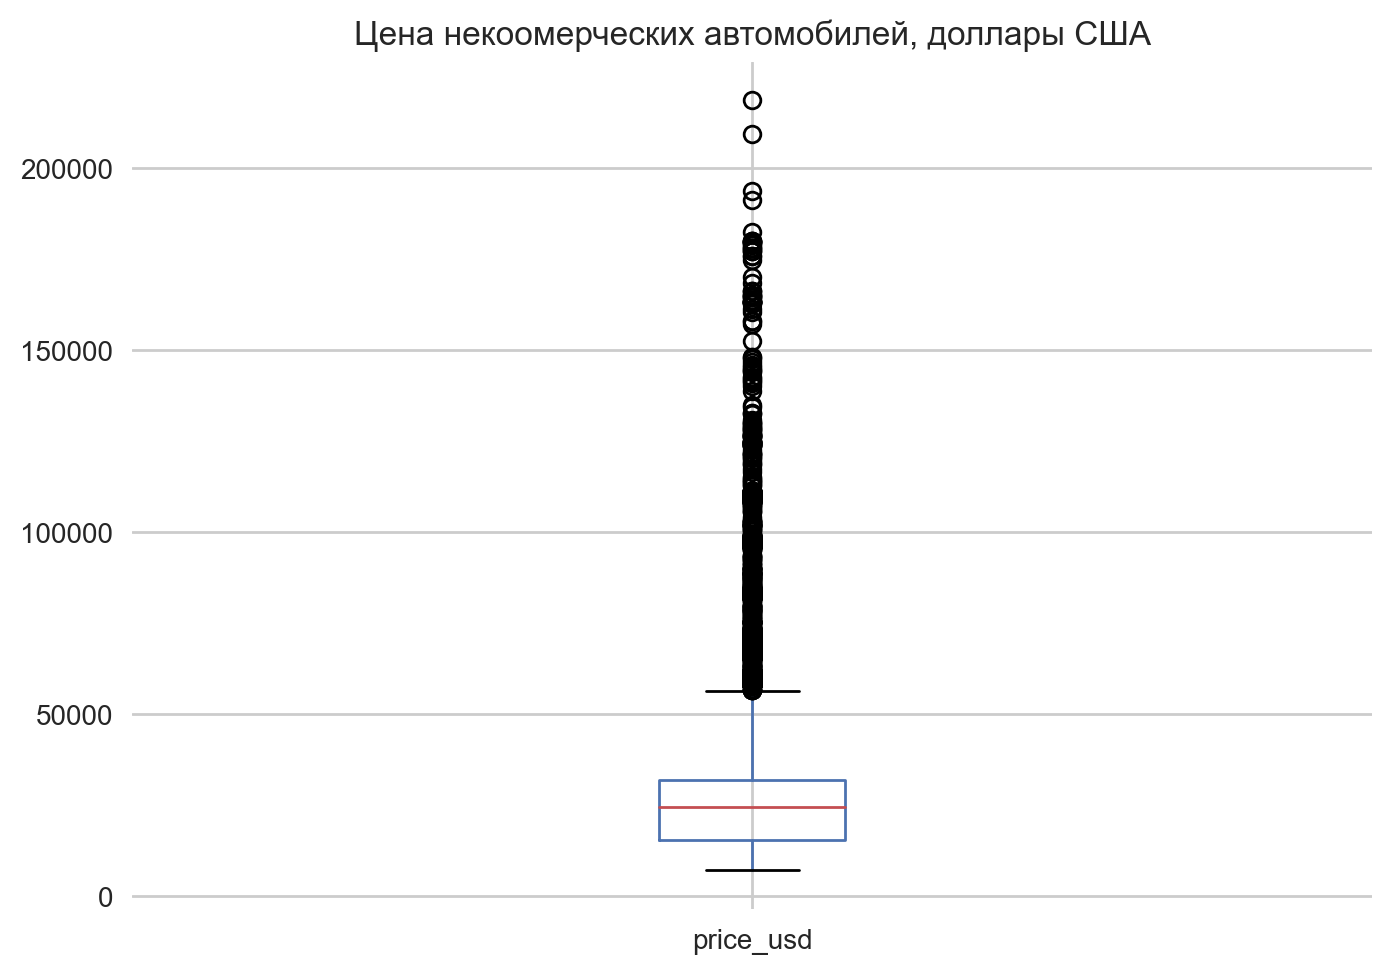

In [73]:
data_non_comm.boxplot('price_usd')
plt.title('Цена некоомерческих автомобилей, доллары США', fontsize=12);

На графике видно, что для некоммерческих автомобилей характерны многочисленные выбросы - фактичсеки, это все автомобили дороже 60 000 долларов США.
Удалим выбросы, построим график на очищенных данных и выведем информацию по процентилям.

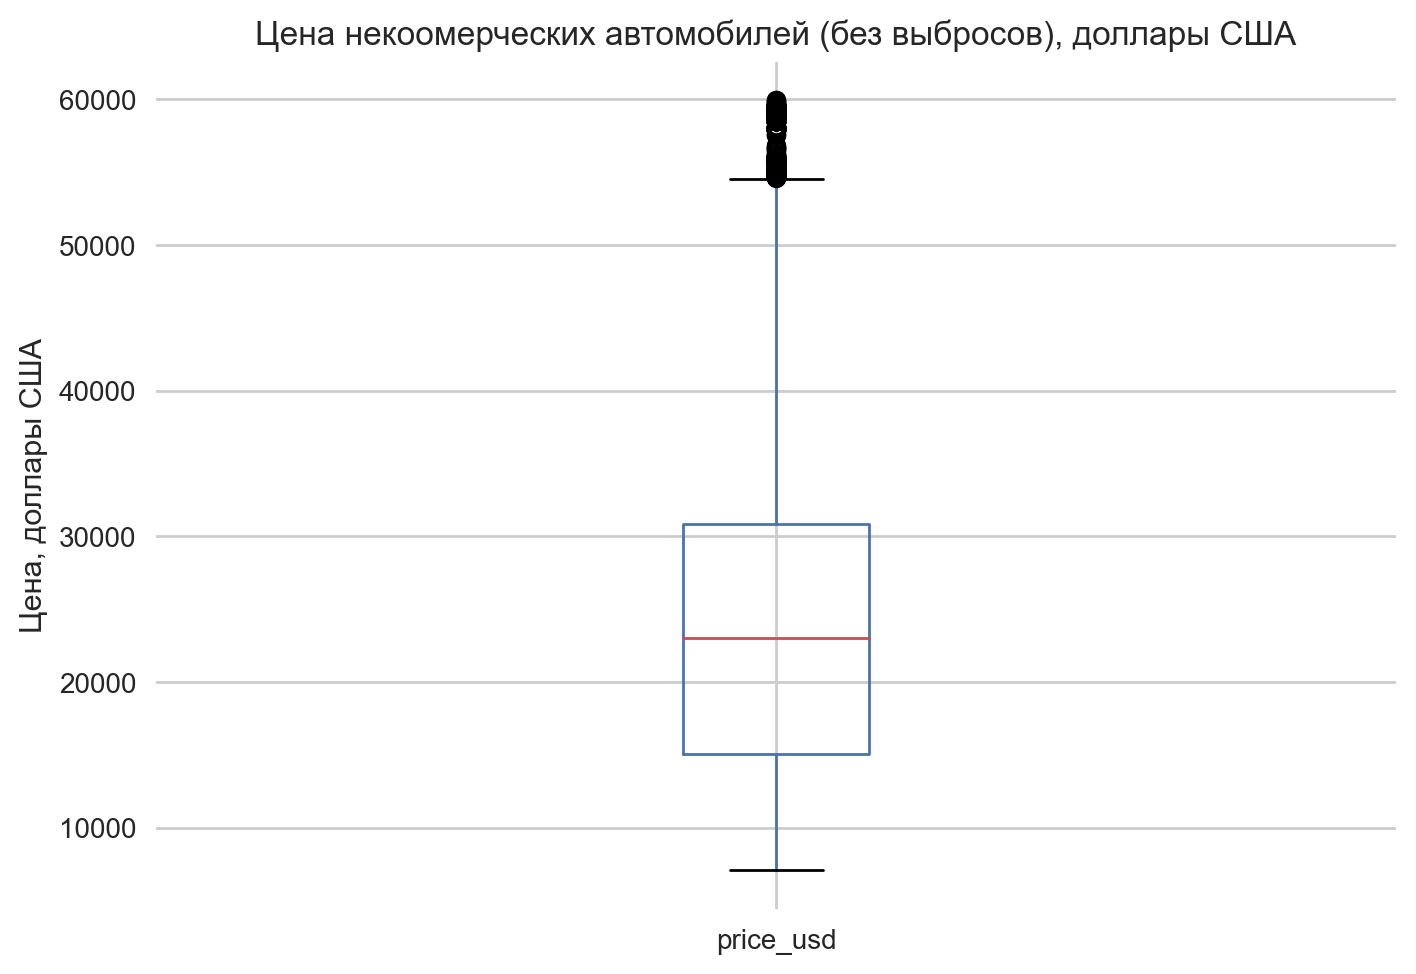

In [74]:
data_non_comm_cleared = data_non_comm.query('price_usd<60000')
data_non_comm_cleared.boxplot('price_usd')
plt.title('Цена некоомерческих автомобилей (без выбросов), доллары США', fontsize=12)
plt.ylabel('Цена, доллары США');

In [75]:
data_non_comm_cleared['price_usd'].describe()

count   33661.00
mean    24238.82
std     11269.40
min      7100.00
25%     15058.20
50%     23050.40
75%     30850.75
max     59958.07
Name: price_usd, dtype: float64

Теперь нагляднее видно, что средняя цена коммерческих автомобилей сотсавляет 24 238 долл. США, а минимальная - 7 100 долл. США.
Создадим новый столбец с категориями цен на некоммерческие автомобили в соответствии с процентилями.

In [76]:
# классификация для некоммерческих
price_labels = ['economy', 'budget', 'business', 'lux'] # задаем категории
price_bins = [0, 15000, 23000,31000, 220000] # интервалы для категорий
#создаем новый столбец с категориями по цене
data['price_class'] = pd.cut(data.query('segment_2013!="Коммерческие автомобили"').price_usd, bins=price_bins, labels=price_labels)

Теперь так же проанализируем цены на коммерческие автомобили.

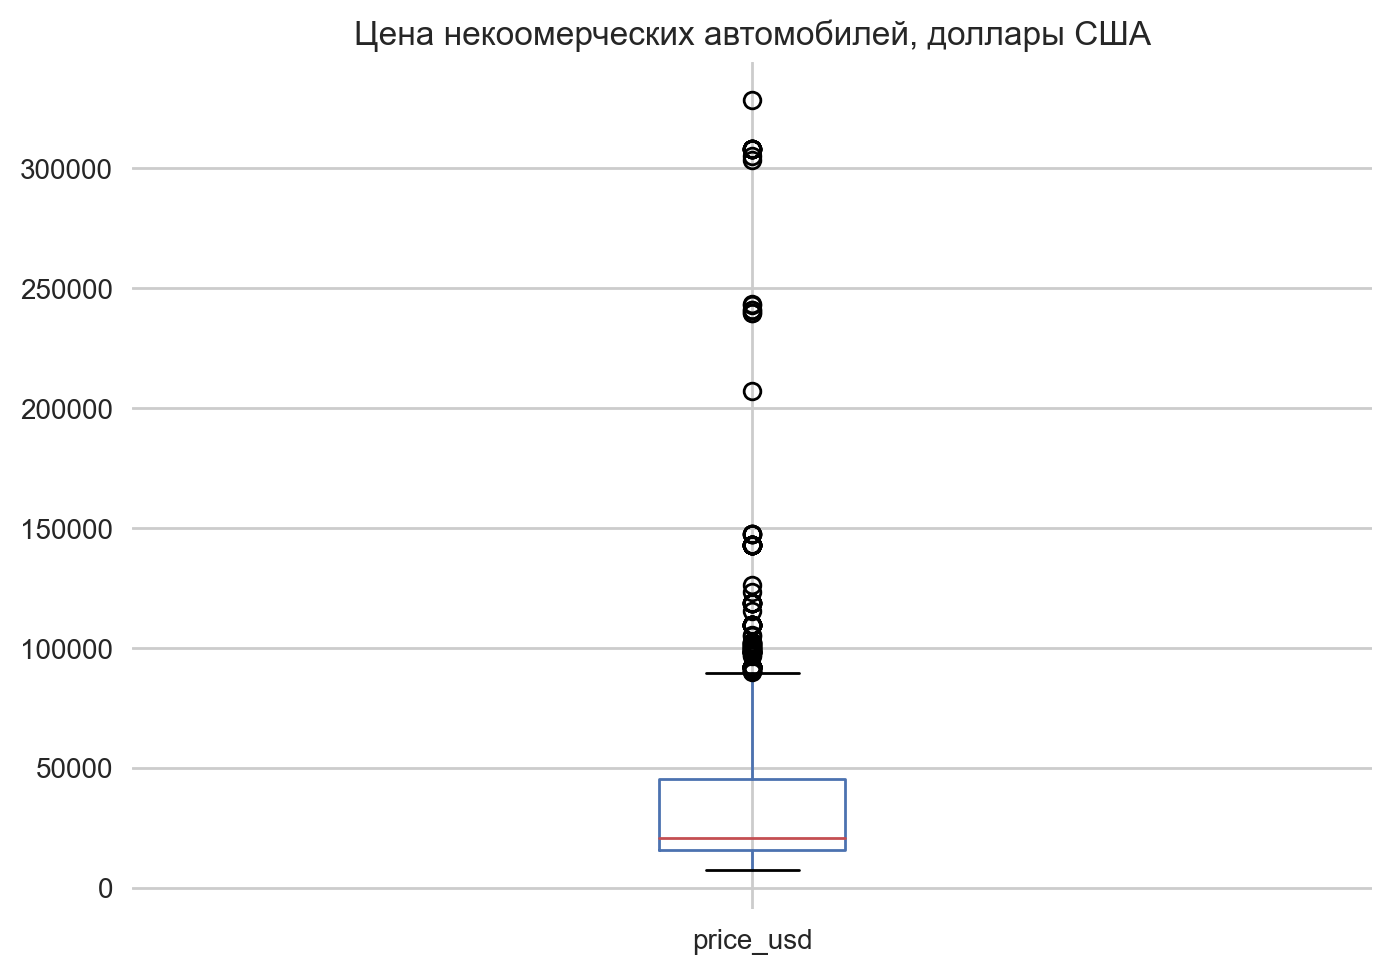

In [77]:
data_comm.boxplot('price_usd')
plt.title('Цена некоомерческих автомобилей, доллары США', fontsize=12);

На графике видно, что для цены коммерческих автомобилей так же  характерны многочисленные выбросы - фактичсеки, это все автомобили дороже 100 000 долларов США. Удалим выбросы, построим график на очищенных данных и выведем информацию по процентилям.

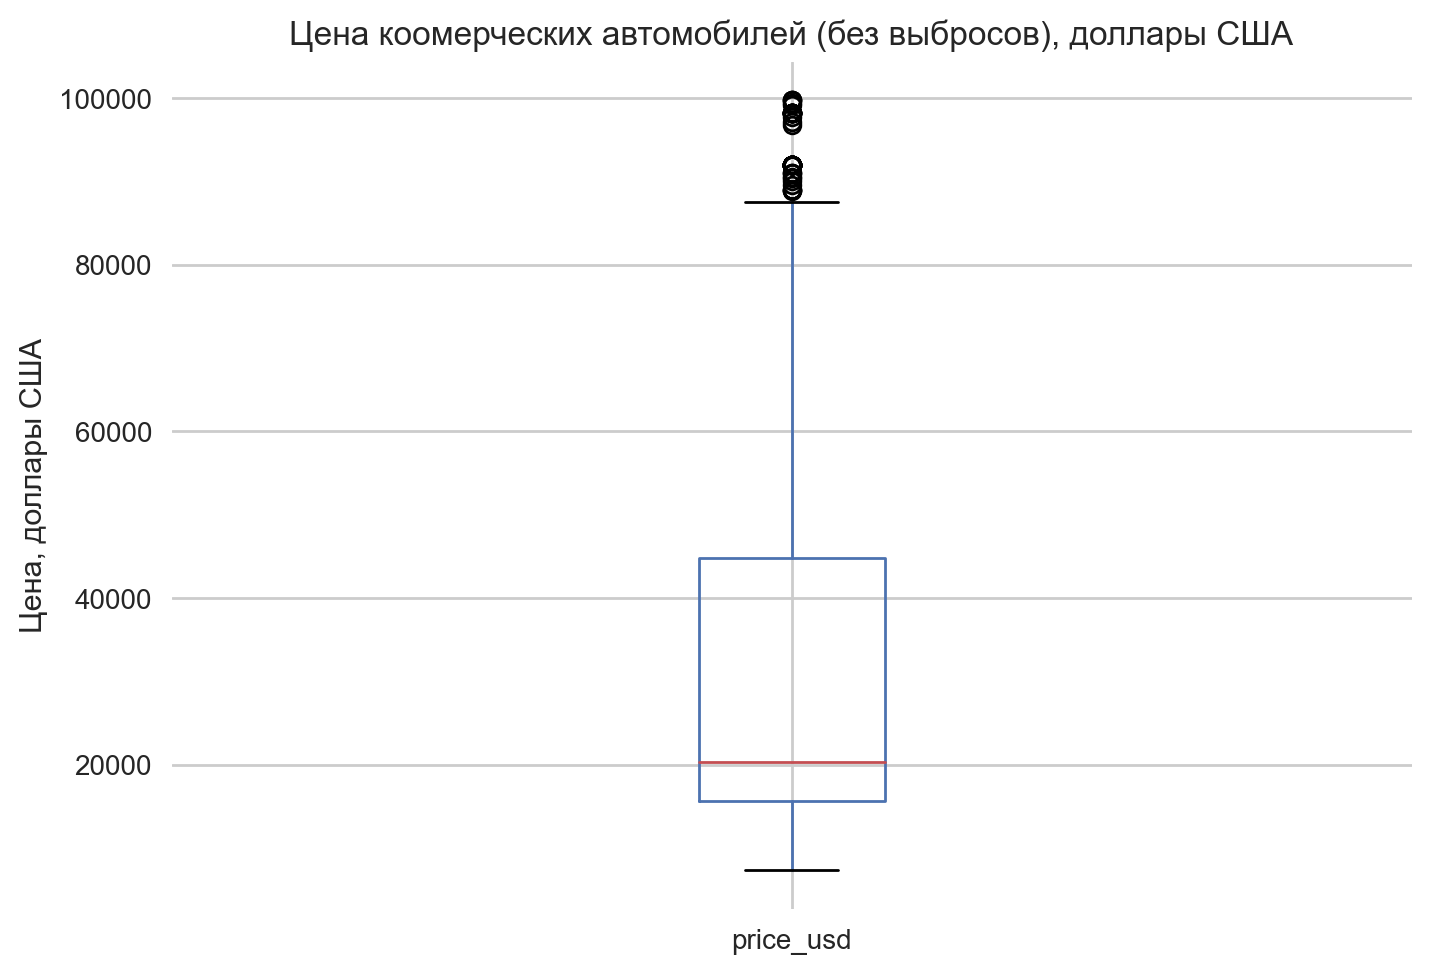

In [78]:
data_comm_cleared = data_comm.query('price_usd<100000')
data_comm_cleared.boxplot('price_usd')
plt.title('Цена коомерческих автомобилей (без выбросов), доллары США', fontsize=12)
plt.ylabel('Цена, доллары США');

In [79]:
data_comm_cleared['price_usd'].describe()

count    4235.00
mean    31219.00
std     21427.25
min      7363.00
25%     15633.83
50%     20358.44
75%     44803.94
max     99767.26
Name: price_usd, dtype: float64

Теперь нагляднее видно, что средняя цена коммерческих автомобилей составляет 32 219 долл. США - почти на 10 000 дороже, чем у некоммерческих, а вот минимальные цены похожи - 7 363 долл. США у коммерческих и 7 100 у некоммерческих автомобилей.
Создадим новый столбец с категориями цен на некоммерческие автомобили в соответствии с процентилями.

In [80]:
# классификация для некоммерческих
price_labels = ['economy', 'budget', 'business', 'lux'] # задаем категории
price_bins = [0, 15633, 20300,44800, 330000] # интервалы для категорий
#создаем новый столбец с категориями по цене
#data['price_class'] = pd.cut(data.query('segment_2013=="Коммерческие автомобили"').price_usd, bins=price_bins, labels=price_labels)

In [81]:
# классификация для коммерческих авто
price_labels = ['economy', 'budget', 'business', 'lux'] # задаем категории
price_bins = [0, 15500, 25000, 32500, 350000] # интервалы для категорий
data['price_class'] = pd.cut(data.query('segment_2013!="Коммерческие автомобили"').price_usd, bins=price_bins, labels=price_labels) #создаем новый столбец с категориями двигателей

### 23. Удалить все ненужные столбцы

Удалим все ненужные для анализа столбцы  - сегмент, модификация, регион,  форма расчета, сегментация Eng, локализация производства

In [82]:
data.drop(['modification', 'segment', 'region','payment_type', 'segment_eng','product_localization'], axis= 1 , inplace= True )

## Анализ рынка 

### 1. Емкость рынка автомобилей

Оценим ёмкость рынка автомобилей в денежном и количественном выражении за 9 месяцев, среднюю цену проданного автомобиля, а потом построим прогноз по продажам до конца  2019 года по многолетним данным заказчика на 4 квартал приходится 40% годовых продаж, используем эту цифру для прогноза.

In [83]:
market_size_volume=data['quantity'].sum().astype (int)
market_size_amount=data['sell_price_usd'].sum().astype (int)

display(f'Емкость рынка автомобилей за 9 месяцев 2019 года составляет  {market_size_volume:,} автомобилей,\
а за весь 2019 прогнозно эти цифра достигнет  {market_size_volume+market_size_volume*0.4:,} автомобилей.\
Средняя цена проданного за 9 месяцев 2019 года составила {market_size_amount/market_size_volume:,} долларов США')
display(f'Емкость рынка автомобилей за 9 месяцев 2019 года составляет  {market_size_amount:,} долларов США,\
а за весь 2019 прогнозная цифра продаж составит {market_size_amount+market_size_amount*0.4:,} долларов США')

'Емкость рынка автомобилей за 9 месяцев 2019 года составляет  53,880 автомобилей,а за весь 2019 прогнозно эти цифра достигнет  75,432.0 автомобилей.Средняя цена проданного за 9 месяцев 2019 года составила 25,040.069933184855 долларов США'

'Емкость рынка автомобилей за 9 месяцев 2019 года составляет  1,349,158,968 долларов США,а за весь 2019 прогнозная цифра продаж составит 1,888,822,555.2 долларов США'

### 2. Марки - лидеры рынка

Посмотрим, какие марки занимают лидирующие позиции на рынке 

In [84]:
# отфильтруем данные, сгруппируем по городам и посчитаем объявления
data_brand_top= data.groupby('brand')[['brand']].count()
# переименуем столбец
data_brand_top.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_brand_top = data_brand_top.reset_index().sort_values(by='total_count', ascending=False).head(10)
list=data_brand_top['brand'].tolist ()

data_top_list=data.query('brand in list')
data_chain_pivot = data_top_list.pivot_table(index='brand', columns='segment_2013',values='quantity', aggfunc='sum', margins=True).sort_values('All', ascending=True).drop('All', axis=1).drop('All')

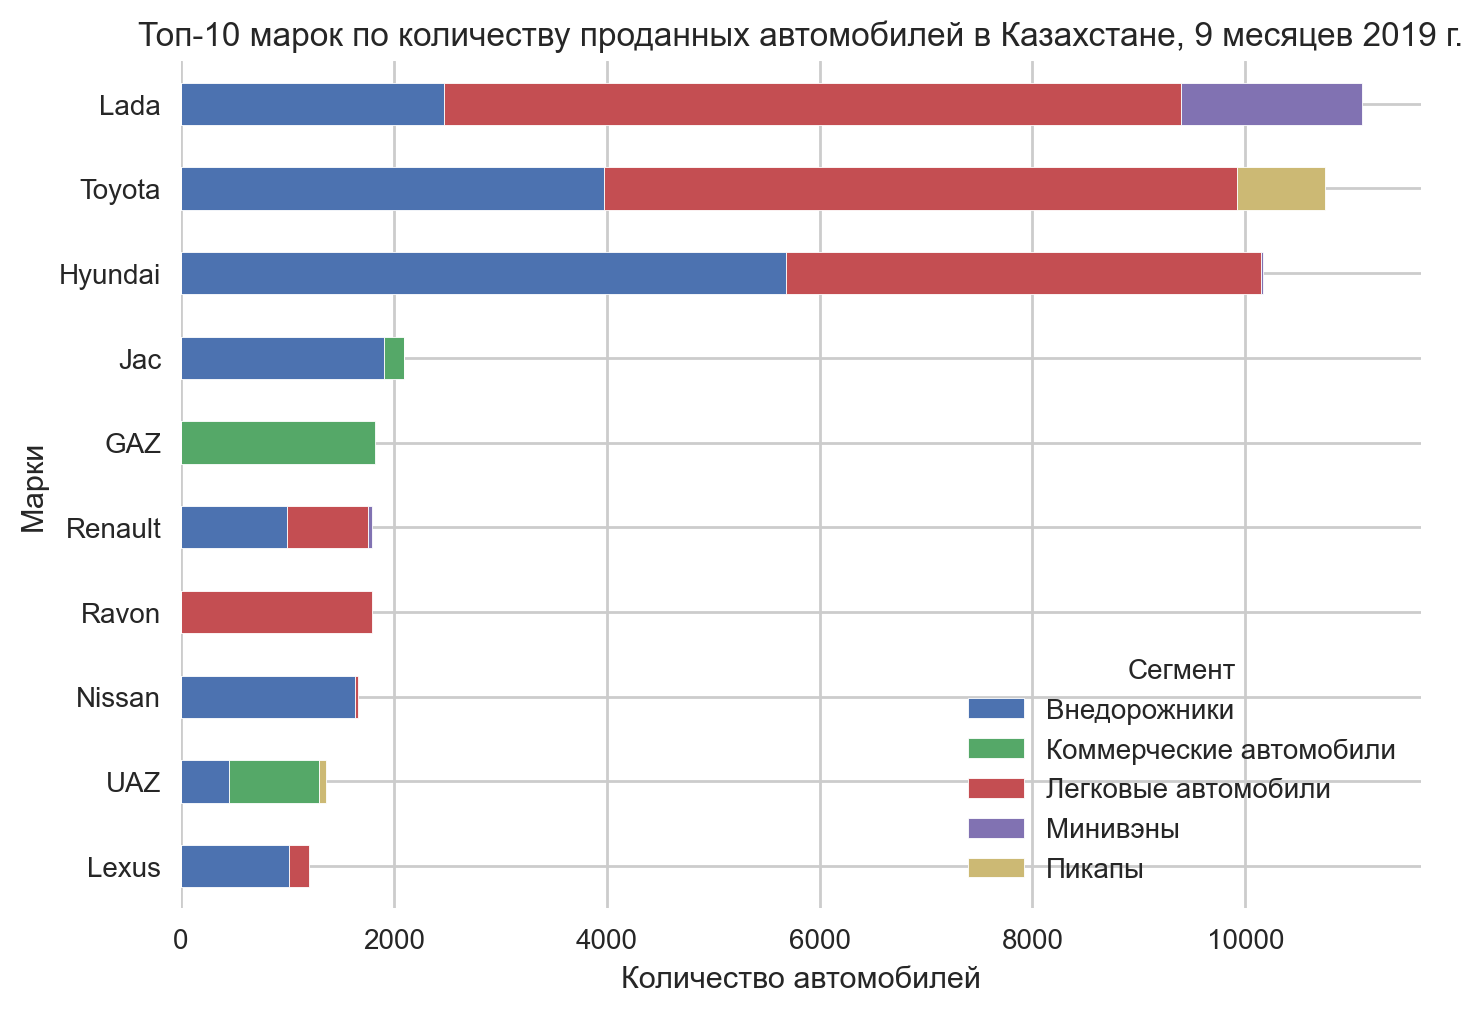

In [85]:
data_chain_pivot.plot(kind='barh', stacked=True)
plt.title('Топ-10 марок по количеству проданных автомобилей в Казахстане, 9 месяцев 2019 г.', fontsize=12)
plt.xlabel('Количество автомобилей')
plt.ylabel('Марки')
plt.legend(title='Сегмент');
plt.show();

На рынке Казахстана прослеживаются три явных лидера, проддавших более 10 000 автомобилей  -  это Lada,  Toyota и Hunday, во всех трёх марках самые популярные модели относятся к классам внедорожников и легковых автомобилей.

Продажи их конкурентов по первой десятке колеблются в районе 2 000 автомобилей - это прежде всего Jac, GAZ, Renault, Ravon и Nissan.

### 2. Динамика рынка - общая и  по сегментам 

Интересно будет посмотреть на динамику продаж автомобилей,  сначала общую, а потом более подробно - по сегментам и средней цене. 

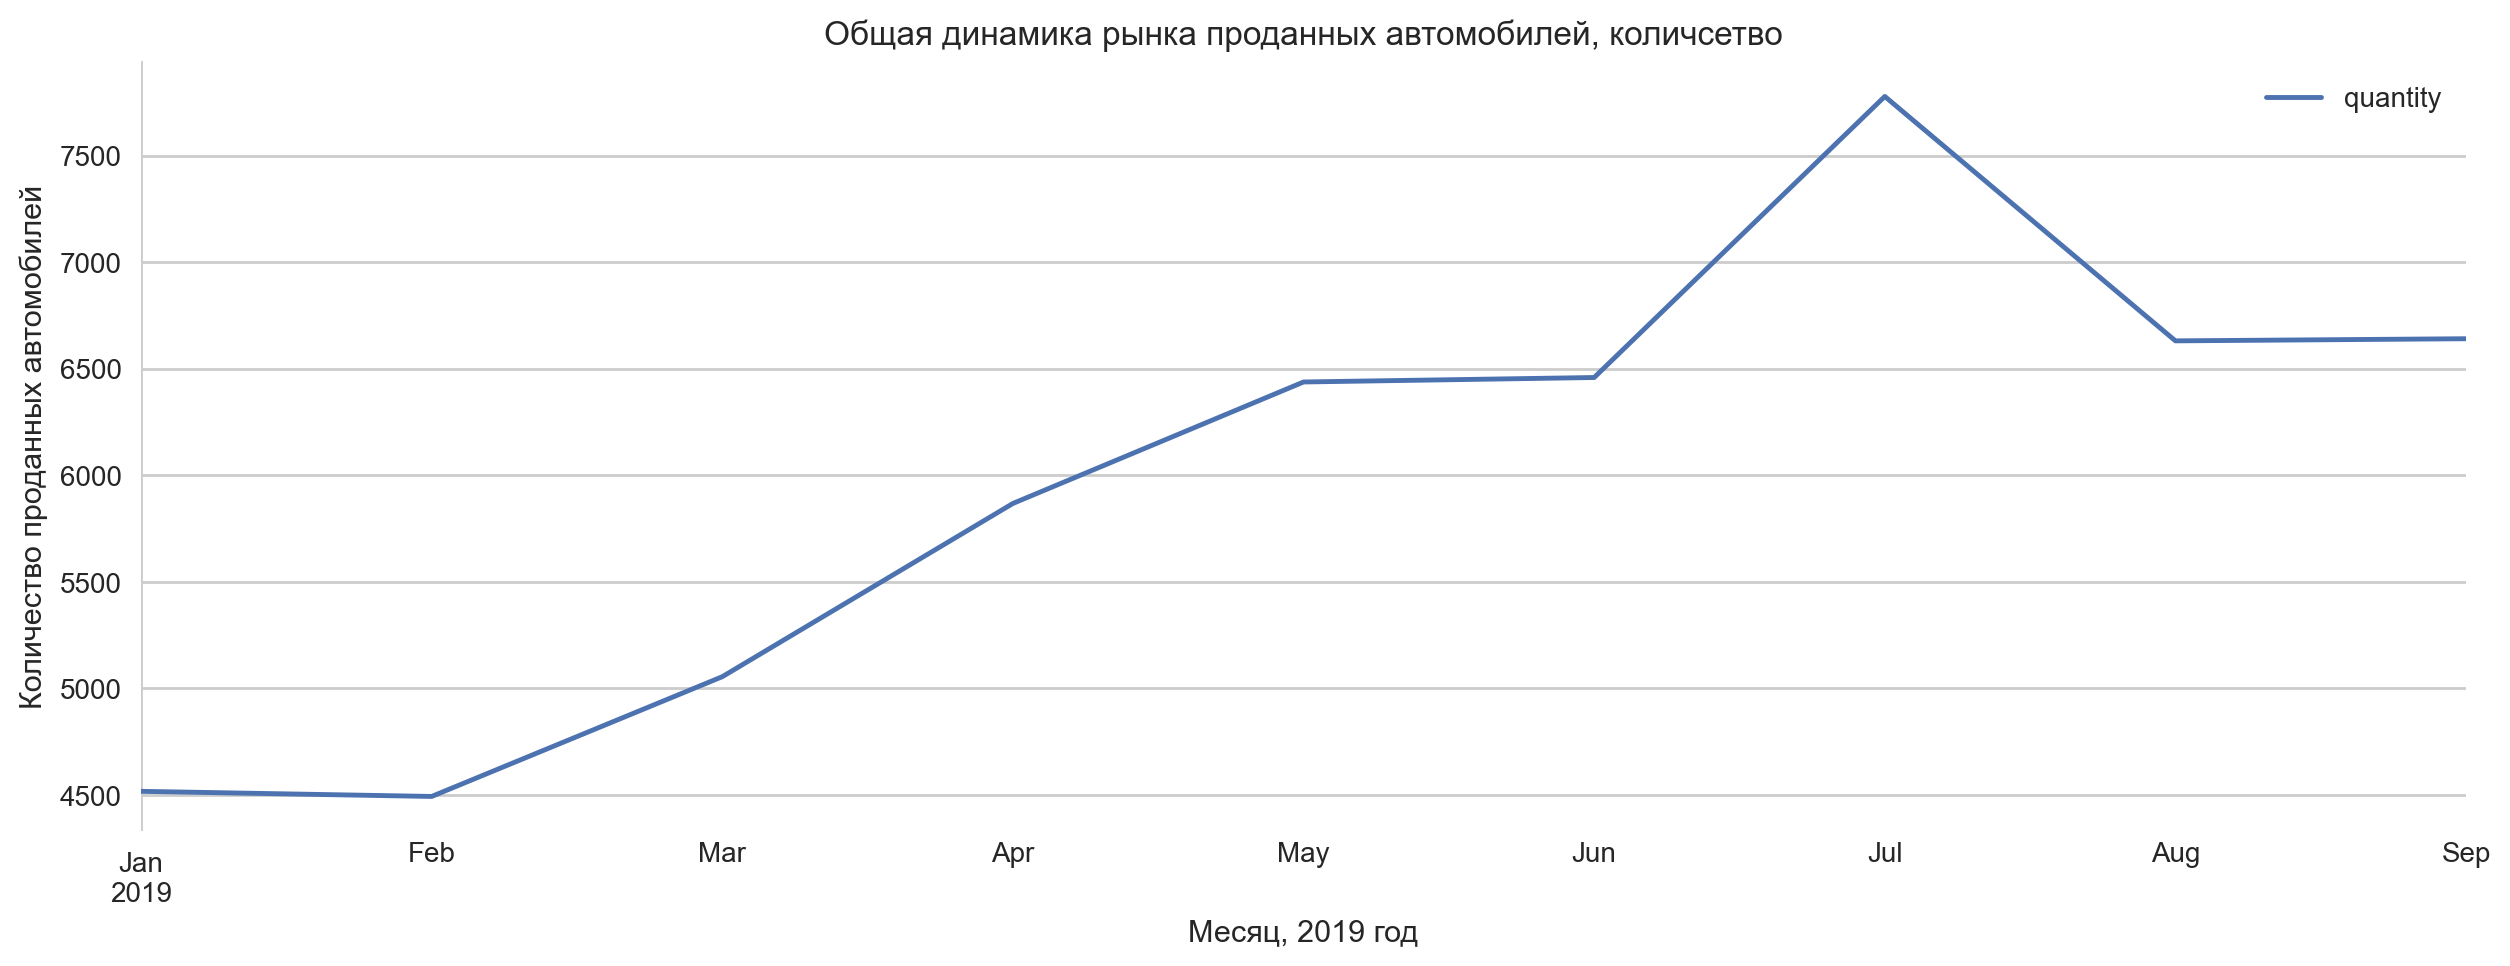

In [86]:
data.pivot_table(
    index='month',  # даты первых посещений
    values='quantity',  # ID пользователей
    aggfunc='sum').plot(figsize=(15, 5), grid=True )  # подсчёт уникальных значений

plt.xlabel('Месяц, 2019 год')
plt.ylabel('Количество проданных автомобилей')
plt.title('Общая динамика рынка проданных автомобилей, количсетво')
plt.show()  

Похоже, модно говорить о наличии сезонности в спросе на автомобили - после почти "мёртвого" первого квартала с апреля начинается резкий рост продаж,  пик наступает в июле, и потоп снова начинается спад до уровней мая -июня.

Теперь посмотрим как меняется динамика продаж по категориям, но укрупним их до двух - коммерческого и некоммерческого транспорта.

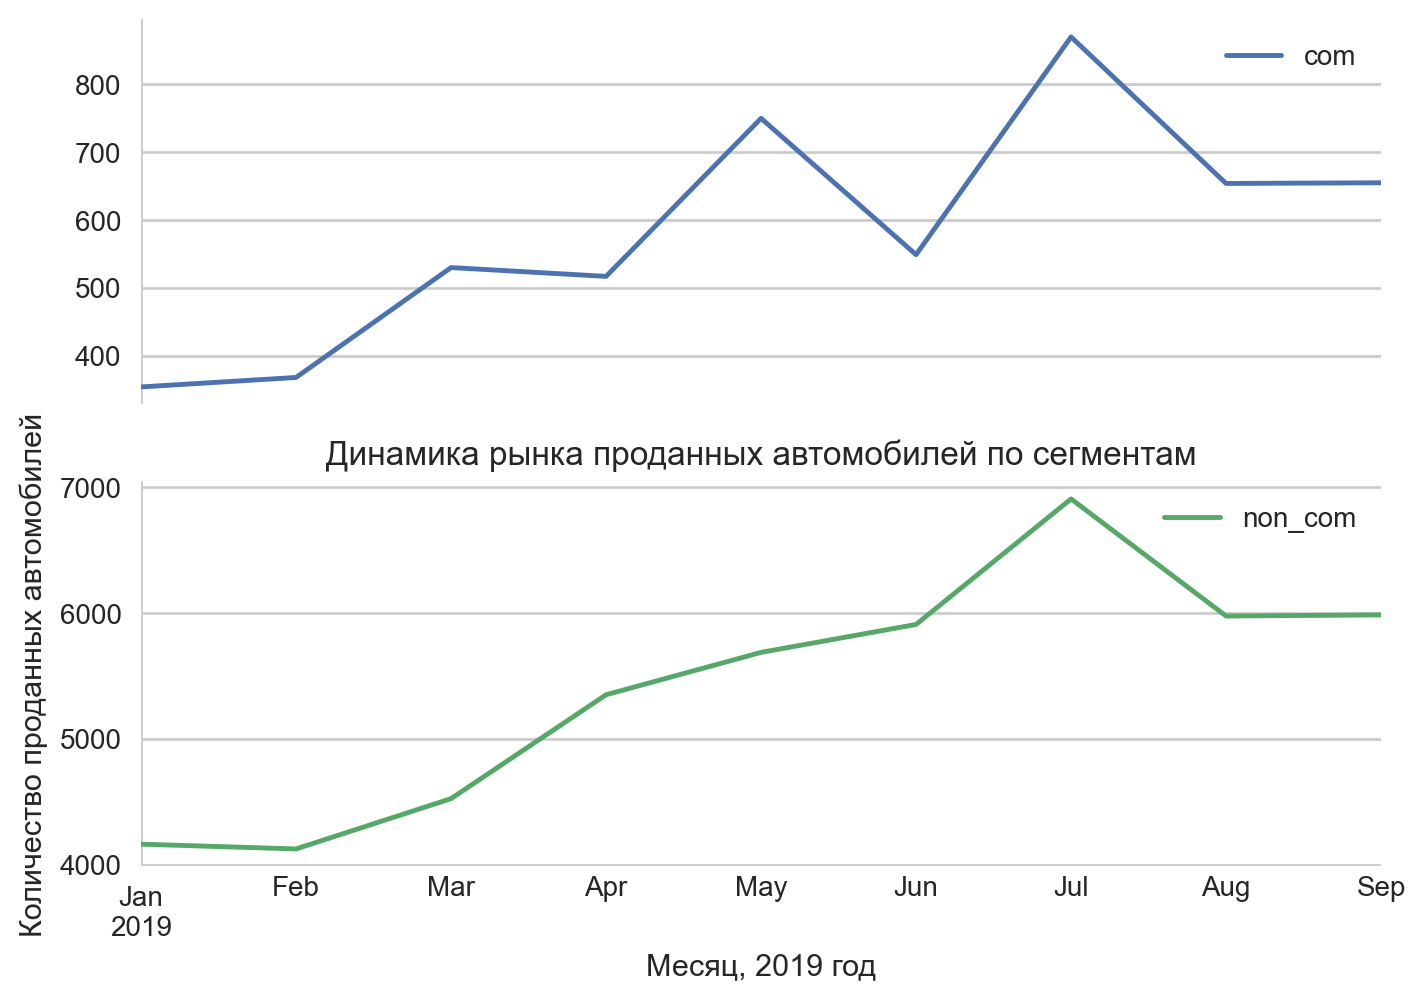

In [87]:
# добавляем новый столбец с категорией коммерческого и некоммерческого транспорта
data['type_commercial'] = np.where(data['segment_2013']=='Коммерческие автомобили', 'com','non_com') 

pd.pivot_table(data.reset_index(),
 index='month', columns='type_commercial', values='quantity',
  aggfunc='sum').plot(subplots= True )
plt.xlabel('Месяц, 2019 год')
plt.ylabel('Количество проданных автомобилей')
plt.title('Динамика рынка проданных автомобилей по сегментам'); 

На рынке Казахстана продаётся в разы больше некоммерческих автомобилей. При этом динамика продаж коммерческих и некоммерческих автомобилей во многом похожа - пик продаж приходится на июль, но у некоммерческих автомобилей график роста продаж более плавный, без пиков.

На пике продаж в июле продавалось до 900 некоммерческих  и до 7 000 некоммерческих автомобилей.

### 3. Продажи автомобилей в разрезе сегментов и брендов

Теперь оценим продажи автомобилей в Казахстане по брендам, оставив разбику по коммерческим и некоммерческим автомобилям.

In [88]:
# отфильтруем данные, сгруппируем по городам и посчитаем объявления
data_brand_top_comm= data_comm.groupby('brand')[['brand']].count()
# переименуем столбец
data_brand_top_comm.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_brand_top_comm = data_brand_top_comm.reset_index().sort_values(by='total_count', ascending=False).head(10)
list_comm=data_brand_top_comm['brand'].tolist ()

data_comm_top_list=data_comm.query('brand in @list_comm')
data_comm_pivot = data_comm_top_list.pivot_table(index='brand',values='sell_price_usd', aggfunc='sum', margins=True).drop('All').sort_values('sell_price_usd',ascending=False)

# отфильтруем данные, сгруппируем по городам и посчитаем объявления
data_brand_top_non_comm= data_non_comm.groupby('brand')[['brand']].count()
# переименуем столбец
data_brand_top_non_comm.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_brand_top_non_comm = data_brand_top_non_comm.reset_index().sort_values(by='total_count', ascending=False).head(10)
list_non_comm=data_brand_top_non_comm['brand'].tolist ()

data_non_comm_top_list=data_non_comm.query('brand in @list_non_comm')
data_non_comm_pivot = data_non_comm_top_list.pivot_table(index='brand',values='sell_price_usd', aggfunc='sum', margins=True).drop('All').sort_values('sell_price_usd',ascending=False)






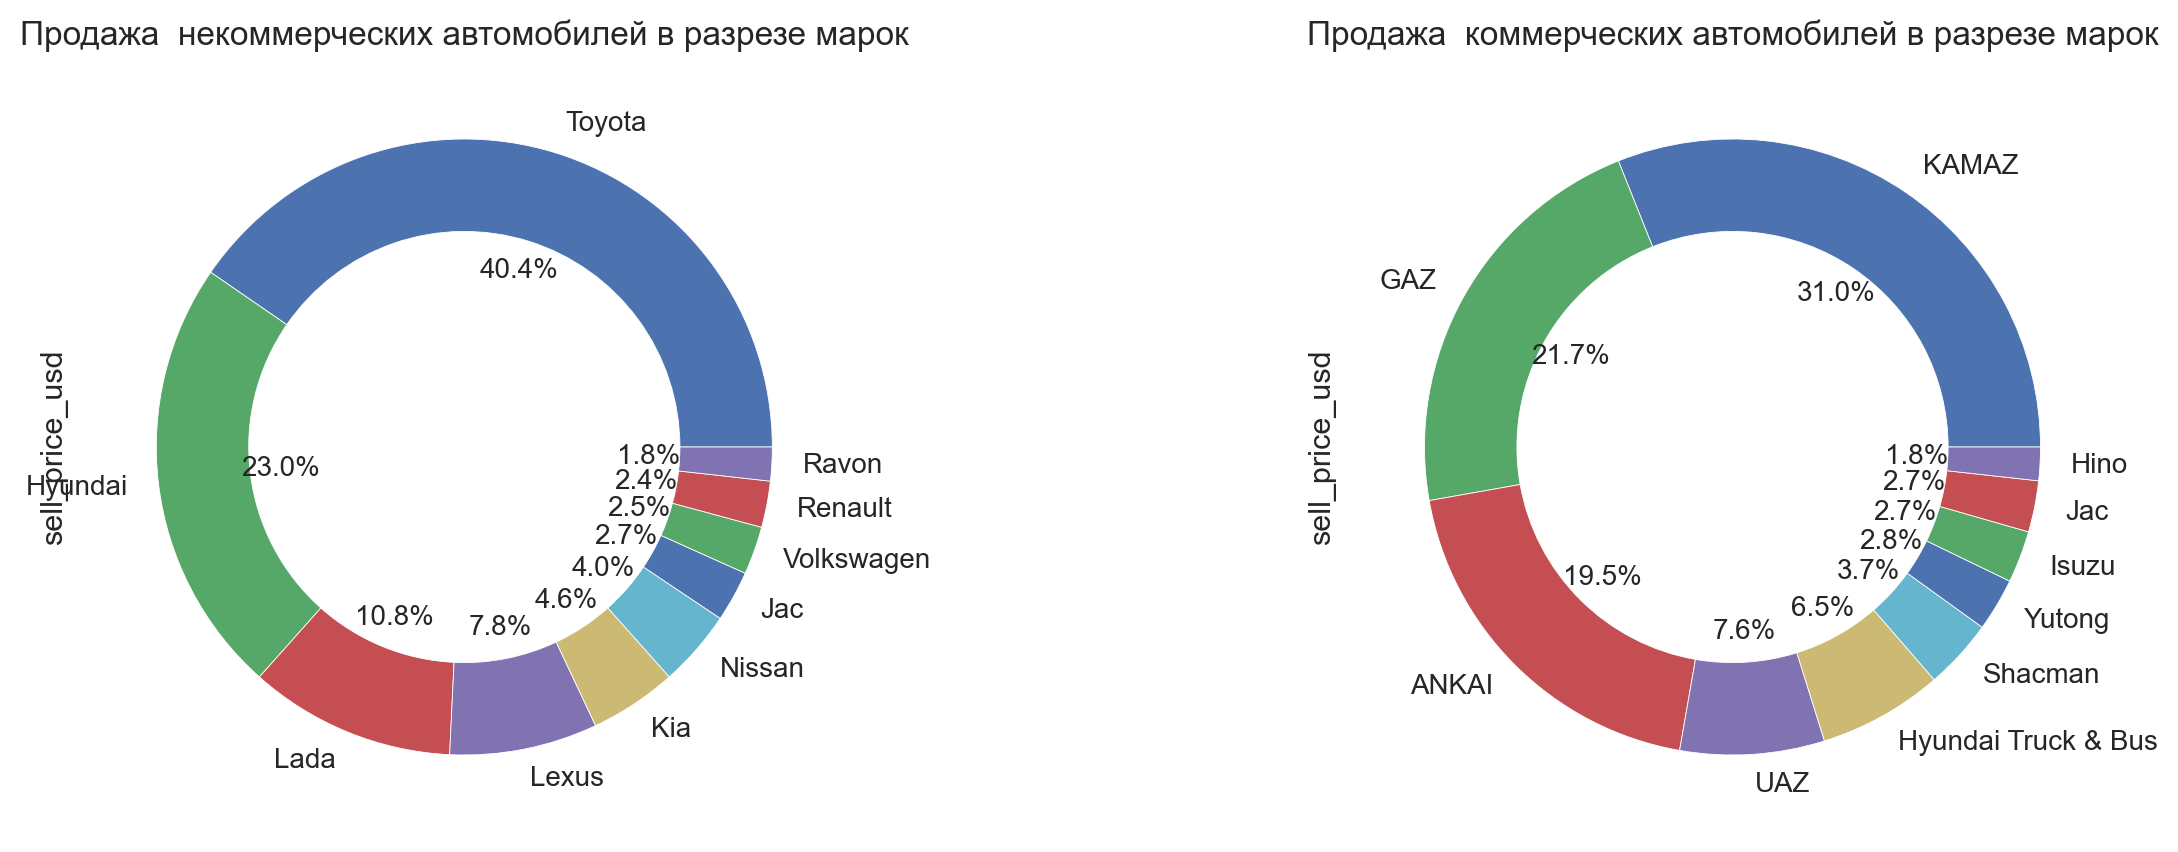

In [89]:
import matplotlib.pylab as plt

fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=2)

data_non_comm_pivot.plot( kind='pie',y='sell_price_usd',autopct='%1.1f%%', legend=False, wedgeprops=dict(width=0.3),ax=axes[0])

data_comm_pivot.plot( kind='pie',y='sell_price_usd',autopct='%1.1f%%', legend=False, wedgeprops=dict(width=0.3),ax=axes[1])

axes[0].set_title('Продажа  некоммерческих автомобилей в разрезе марок')
axes[1].set_title('Продажа  коммерческих автомобилей в разрезе марок') 
plt.show();

В сегменте некоммерческих автомобилей четыре явных лидера - Toyota, Hyundai, Lada и Lexus, вместе они занимают почти 75 % рынка, причём доля Toyota - 40.4%

На рынке некоммерческих автомобилей так же четыре главных игрока - KAMAZ, GAZ, ANKAI, UAZ, самая большая доля у KAMAZ (31%).



### 4. Продажи автомобилей в разрезе сегментов и брендов

Посмотрим, как продажи распределяются по топ-10 регионов, сосредоточившись на некоммерческих автомобилях - заказчик Меркур Авто торгует именно ими. 

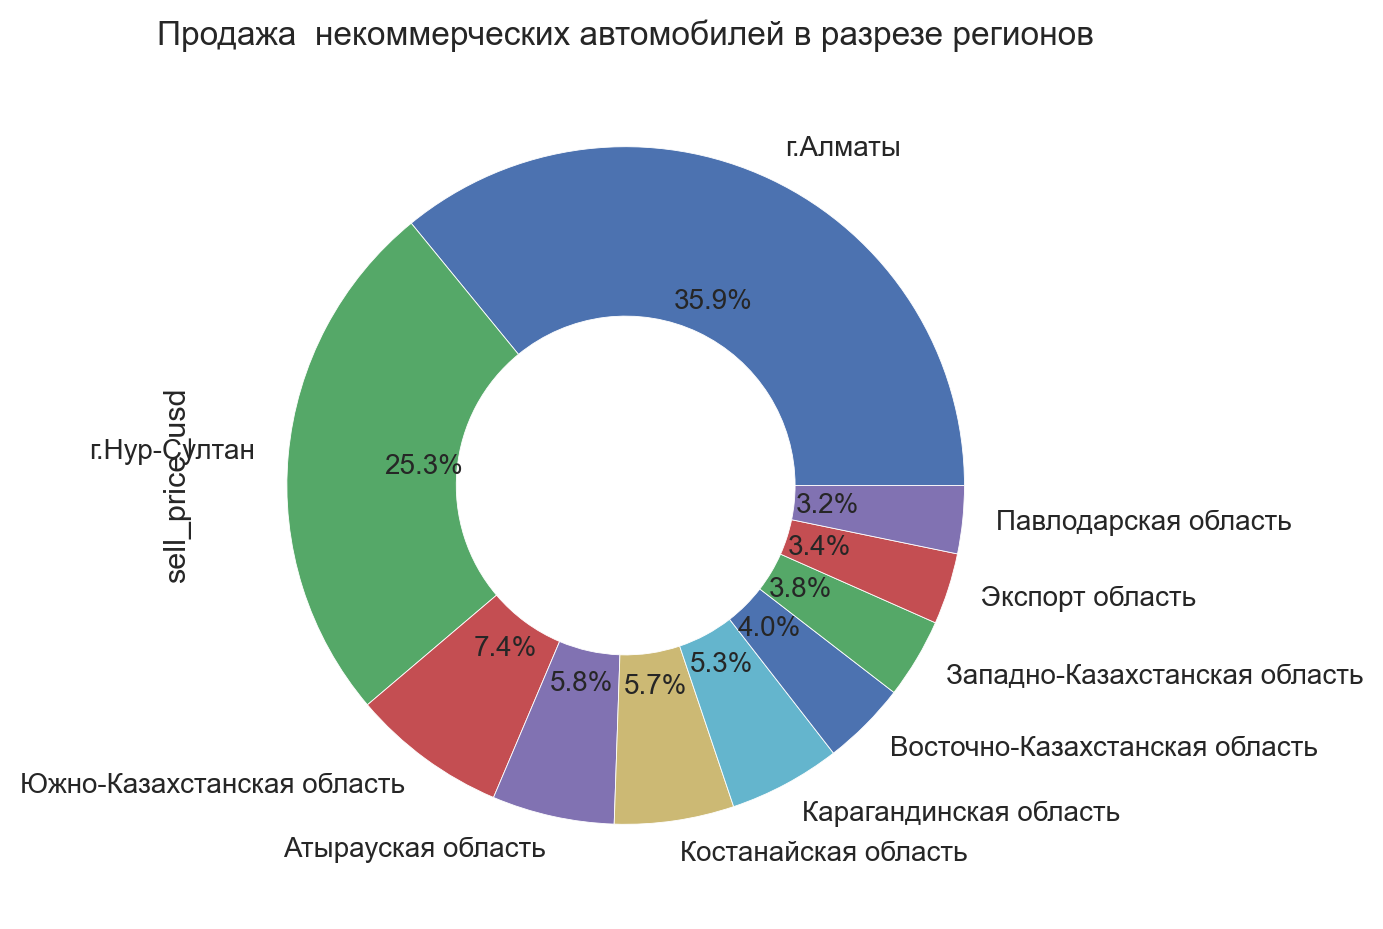

In [90]:

# отфильтруем данные, сгруппируем по рагионам и посчитаем объявления
data_state_top_non_comm= data_non_comm.groupby('state')[['state']].count()
# переименуем столбец
data_state_top_non_comm.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_state_top_non_comm = data_state_top_non_comm.reset_index().sort_values(by='total_count', ascending=False).head(10)
list_non_comm_state=data_state_top_non_comm['state'].tolist ()

data_non_comm_top_list=data_non_comm.query('state in @list_non_comm_state')
data_non_comm_pivot_state = data_non_comm_top_list.pivot_table(index='state',values='sell_price_usd', aggfunc='sum', margins=True).drop('All').sort_values('sell_price_usd',ascending=False)

data_non_comm_pivot_state.plot( kind='pie',y='sell_price_usd',autopct='%1.1f%%', legend=False,wedgeprops=dict(width=0.5))

plt.title('Продажа  некоммерческих автомобилей в разрезе регионов'); 


Больше всего некоммерчекских автомобилей (61,2%) продается в самых населенных городах - Алматы и Нур-Султане, далее с долей более 5% в продажах идут Южно-Казахстанская , Атырауская , Костанайская и Карагандинская области. 

### 5. Продажи автомобилей по дилерам

Определим лидеров среди дилеров, проанализируем,  какое количество дилеров у автоцентров, брендов, в каком количестве регионов они работают

In [91]:
# отфильтруем данные, сгруппируем по городам и посчитаем объявления
data_company_top= data.groupby('company')[['company']].count()
# переименуем столбец
data_company_top.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_company_top = data_company_top.reset_index().sort_values(by='total_count', ascending=False).head(15)
list_company= data_company_top['company'].tolist ()

data_top_list=data.query('company in @list_company')
data_company_pivot_ = data_top_list.pivot_table(index='company', columns='type_commercial', values='sell_price_usd',  aggfunc='sum', margins=True).sort_values('All', ascending=True).drop('All', axis=1).drop('All')


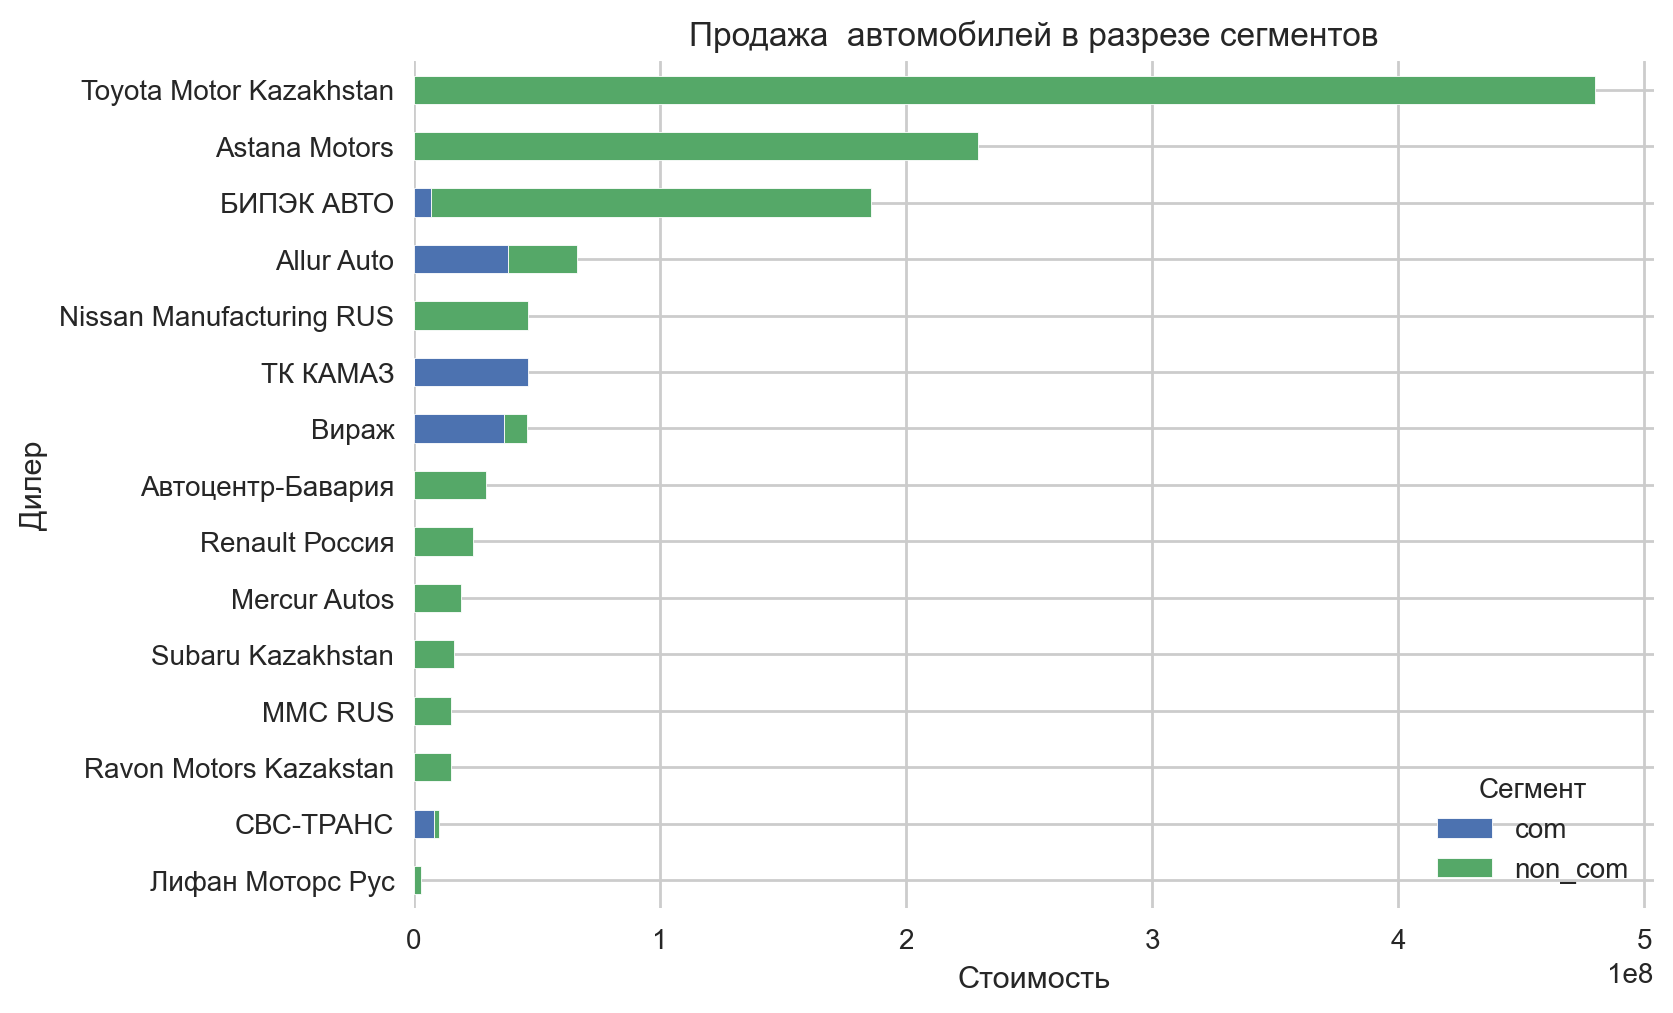

In [92]:
data_company_pivot_.plot(kind='barh', stacked=True)
plt.title('Топ-20 дилеров по проданным автомобилям в Казахстане', fontsize=12)
plt.xlabel('Стоимость')
plt.ylabel('Дилер')
plt.legend(title='Сегмент')
plt.title('Продажа  автомобилей в разрезе сегментов')
plt.show();

Лидеры среди дилеров - компании Toyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО, Allur Auto  и Nissan Manufacturing RUS. Компания Mercur Autos в этом списке только на 10 месте. 

Большинство дилеров специализируются на продаже коммерческих или некоммерческих автомобилей, и даже те, кто работает сразу с двумя сегментами все-таки специализируется на одном.

Теперь хочется посмотреть, как много моно- и мультибрендовых салонов среди них.

In [93]:
data_chain_top= data_top_list.groupby(['company','brand'])[['model']].nunique()
data_chain_top

model
company                  brand            
Allur Auto               ANKAI           4
                         Iveco           5
                         Jac             9
                         MAN             1
                         Peugeot         2
                         Ravon           1
                         Yutong          1
Astana Motors            Hyundai         7
                         Subaru          1
MMC RUS                  Mitsubishi      5
Mercur Autos             Audi            9
                         Porsche         4
                         Volkswagen     10
Nissan Manufacturing RUS Infiniti        4
                         Nissan          6
Ravon Motors Kazakstan   Ravon           2
Renault Россия           Renault         8
Subaru Kazakhstan        Subaru          4
Toyota Motor Kazakhstan  Lexus           8
                         Toyota          8
Автоцентр-Бавария        BMW            14
                         Mini            3
БИПЭК АВТО               Chevrolet       3
                         Kia             9
                         Lada            7
                         Skoda           4
                         UAZ             9
Вираж                    Chevrolet       1
                         GAZ             9
                         UAZ            10
Лифан Моторс Рус         Lifan           6
СВС-ТРАНС                Isuzu           6
                         MAN             1
ТК КАМАЗ                 KAMAZ          24
                         Nefaz           1

 Большинство компаний, включая лидеров, работают с одним или двумя брендами, только один дилер из топ- работает с 7 брендами.
 Зказчик Меркур Авто работает с тремя - Volkswagen, Audi, Lexus.
 

### 6. Продажи автомобилей по моделям

Посмотрим, на распределение топ 10 моделей среди коммерческих и некоомерчсеких авто.

In [94]:
# отфильтруем данные, сгруппируем по моделя
data_model_top_comm= data_comm.groupby('model')[['model']].count()
# переименуем столбец
data_model_top_comm.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_model_top_comm = data_model_top_comm.reset_index().sort_values(by='total_count', ascending=False).head(10)
list_comm=data_model_top_comm['model'].tolist ()

data_comm_top_list=data_comm.query('model in @list_comm')
data_comm_pivot = data_comm_top_list.pivot_table(index=['brand','model'],values='sell_price_usd', aggfunc='sum', margins=True).drop('All').sort_values('sell_price_usd',ascending=False)

# отфильтруем данные, сгруппируем по городам и посчитаем объявления
data_model_top_non_comm= data_non_comm.groupby('model')[['model']].count()
# переименуем столбец
data_model_top_non_comm.columns = ['total_count']
# отсортируем и оставим десять лидеров
data_model_top_non_comm = data_model_top_non_comm.reset_index().sort_values(by='total_count', ascending=False).head(10)
list_non_comm=data_model_top_non_comm['model'].tolist ()

data_non_comm_top_list=data_non_comm.query('model in @list_non_comm')
data_non_comm_pivot = data_non_comm_top_list.pivot_table(index=['brand','model'],values='sell_price_usd', aggfunc='sum', margins=True).drop('All').sort_values('sell_price_usd',ascending=False)




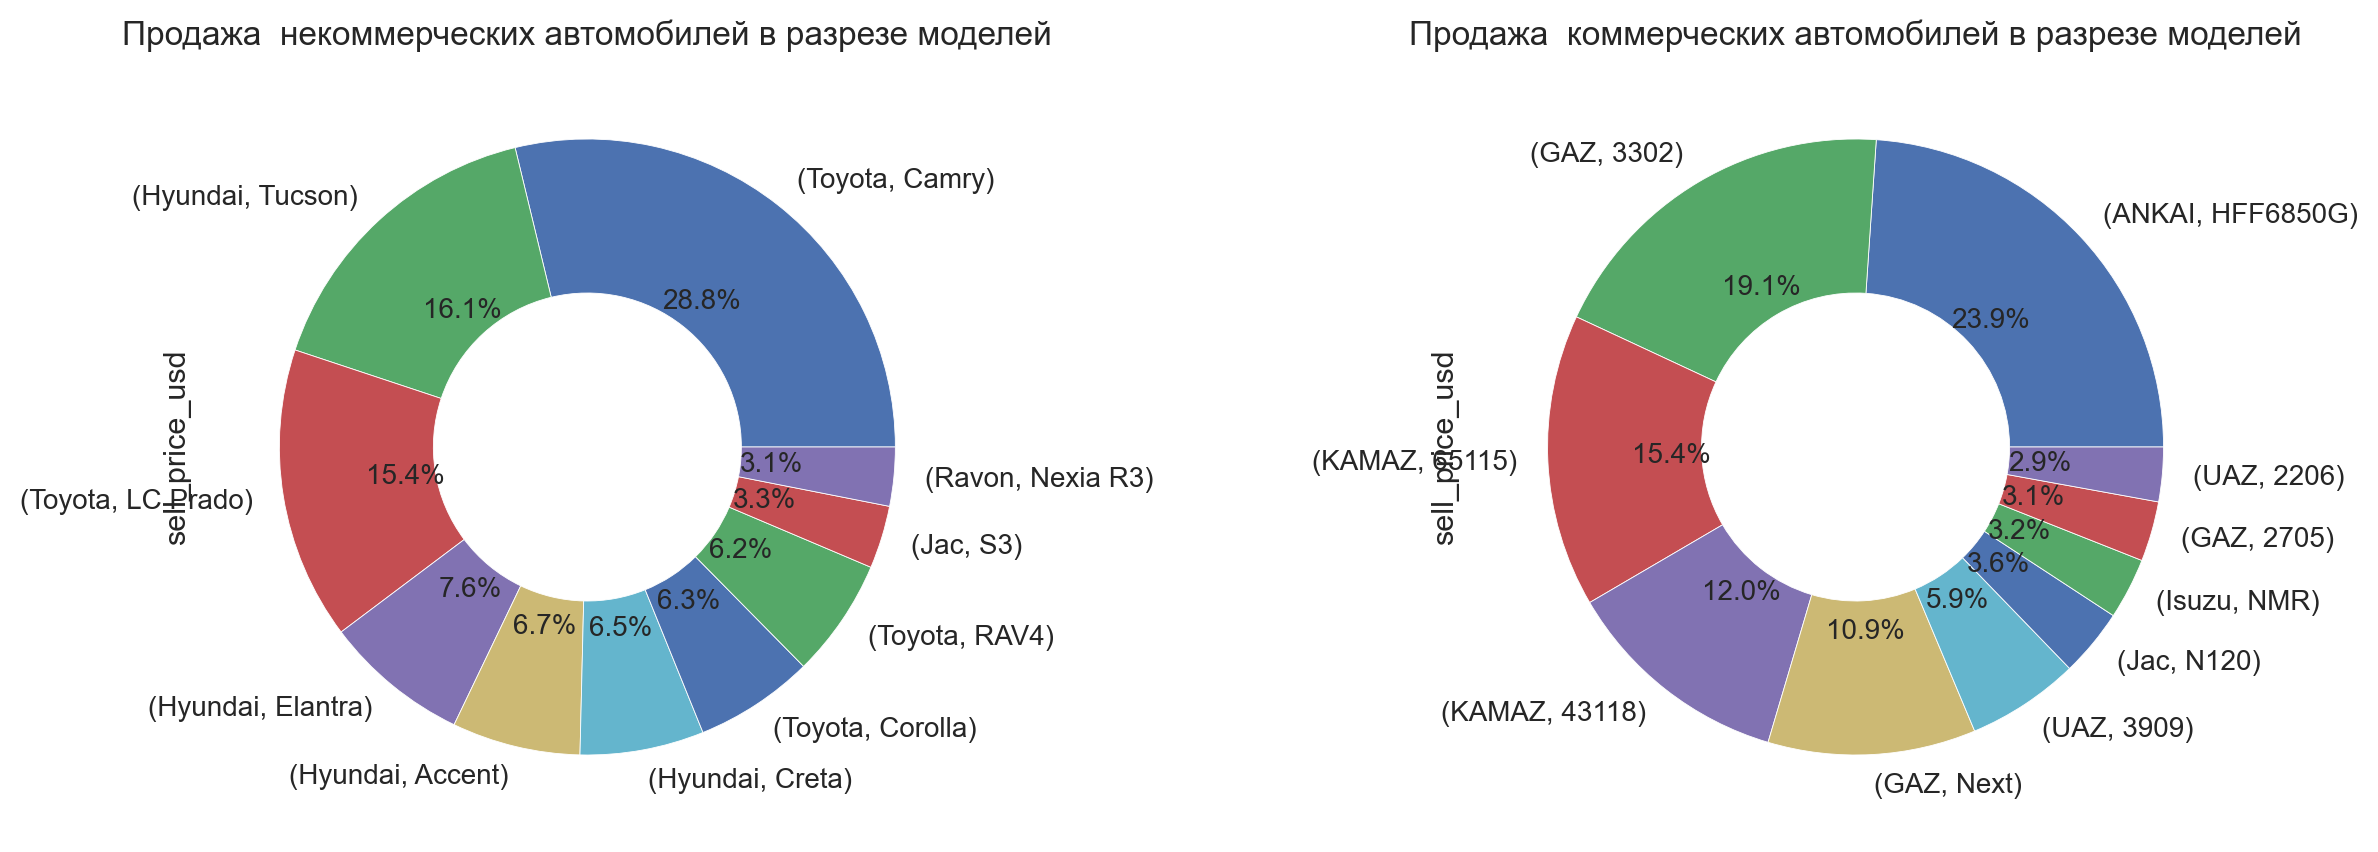

In [95]:

fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=2)


data_non_comm_pivot.plot( kind='pie',y='sell_price_usd',autopct='%1.1f%%', legend=False,wedgeprops=dict(width=0.5), ax=axes[0])

data_comm_pivot.plot( kind='pie',y='sell_price_usd',autopct='%1.1f%%', legend=False,wedgeprops=dict(width=0.5), ax=axes[1])

axes[0].set_title('Продажа  некоммерческих автомобилей в разрезе моделей')
axes[1].set_title('Продажа  коммерческих автомобилей в разрезе моделей') ;

Среди некоммерческого транспорта в топ 10 моделей входят четыре модели Toyota и четыре модели Hyundai, лидеры среди моделей - Toyota Camry, Hyundai Tuscan и Toyota LC Prado, они занимают 60% топа продаж.

В коммерческом транспорте лидеры  - модели ANKAI, KAMAZ и GAZ, в топ-5 входят ANKAI HFF6850G, GAZ 3302, KANAZ 65115, KAMAZ 43118 и GAZ Next, они занимают 80% топа продаж. 

### 6. Проверка гипотезы: стоимость автомобиля зависит от средней заработной платы по региону

Для начала загрузим данные по средней зарплате в Казахстане в 2019 году в Тенге в разрезе районов

In [96]:
# загружаем словарь
salary_dict = {
    'г.Алматы': 224158, 
    'г.Нур-Султан': 226796, 
    'Восточно-Казахстанская область': 162182,
    'Западно-Казахстанская область': 183914, 
    'Костанайская область': 145890,
    'Павлодарская область': 160670, 
    'Южно-Казахстанская область': 110254,
    'Мангистауская область': 294099, 
    'Атырауская область': 351103,
    'Актюбинская область': 156595, 
    'Карагандинская область': 172239,
    'Северо-Казахстанская область': 130233, 
    'Акмолинская область': 140272,
    'Кызылординская область': 152085, 
    'Жамбылская область': 127043,
    'Туркестанская область': 123853, 
    'Алматинская область': 136212
}



Для анализа возьмем только некоммерческие автомобили, и добавим информацию о средней заработной плате в датасет.

In [97]:
# преобразуем словарь  в датафрейм
data_salary = pd.DataFrame.from_dict (salary_dict, orient='index'). reset_index()
data_salary.columns = ['state', 'salary']
# переводим область в врехний регистр
data_salary.state = data_salary.state.str.upper()
data_non_comm.state = data_non_comm.state.str.upper()
# объеденим датафреймы
data_merged_s = pd.merge(data_non_comm, data_salary, how='left',  on='state') 

Построим таблицу корреляции для всех признаков, и отдельно график для иллюстрации по взаимосвязи между средней заработной платой и стоимостью автомобилей.

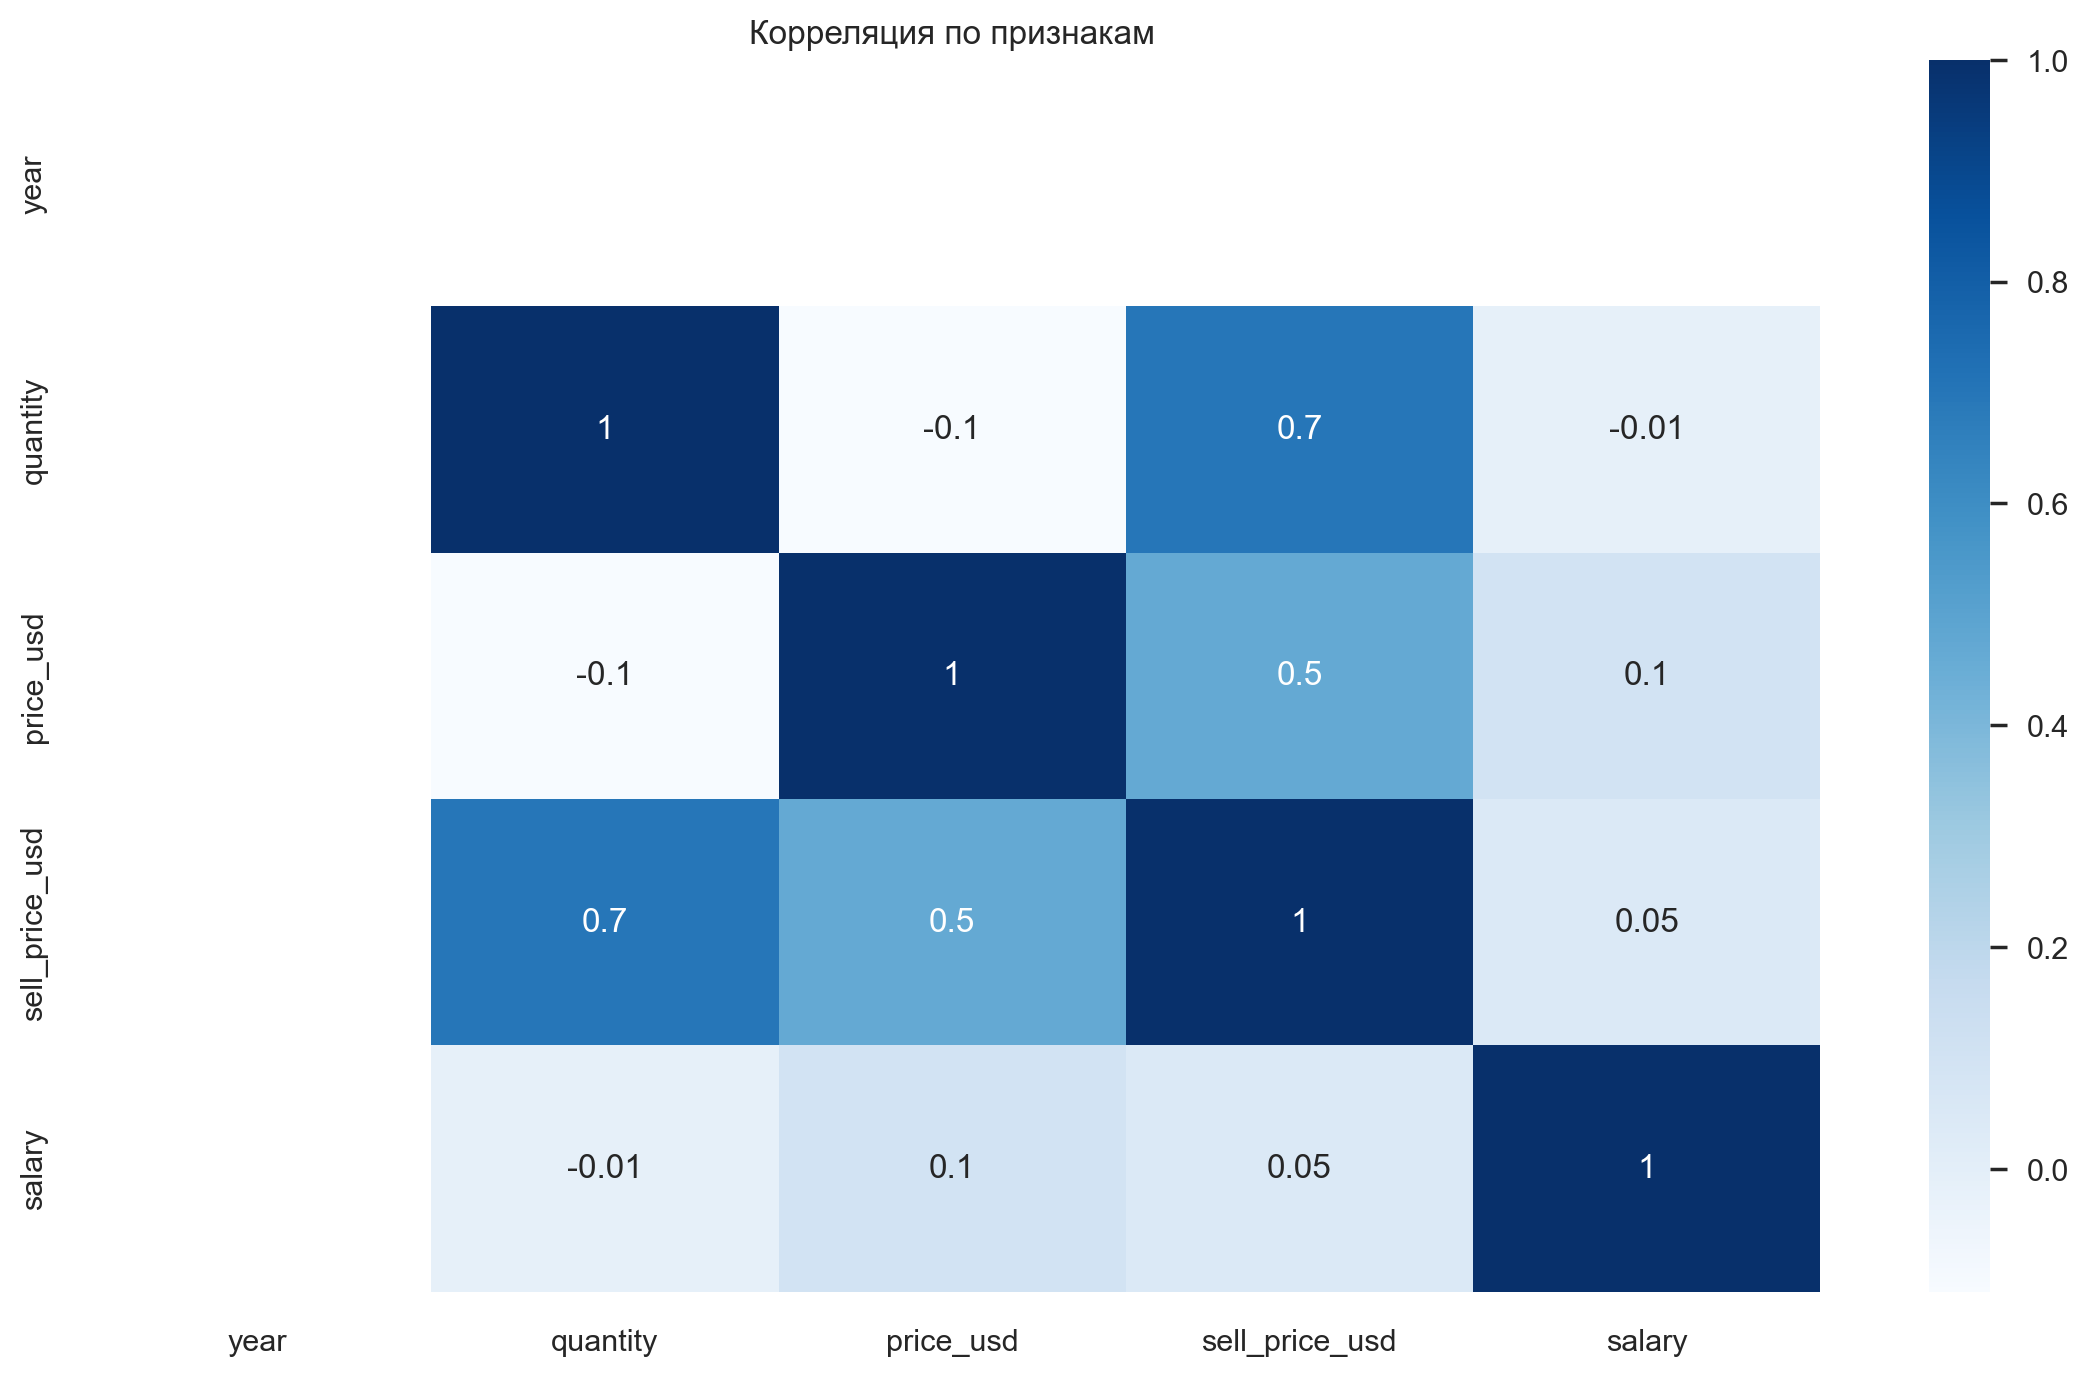

In [98]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = data_merged_s.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
plt.title('Корреляция по признакам');

Судя по матрице корреляции, на стоимость продаваемого автомобиля больше всего влияет объем двигателя, а срежняя зарплата - очень незначительно. Посмторим подробнее на графике диаграмму рассеяния с линией регрессии.

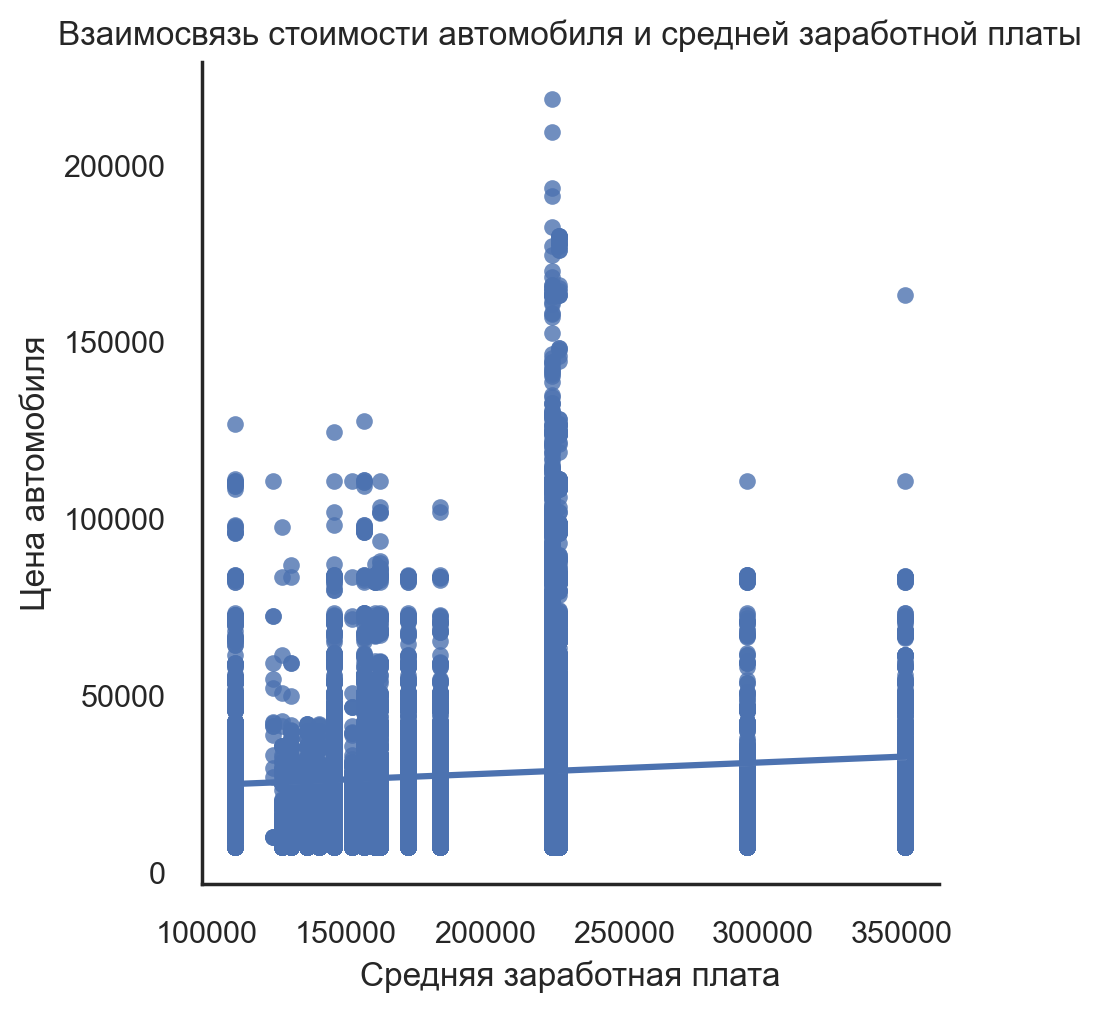

In [99]:
sns.lmplot(data=data_merged_s, y='price_usd', x='salary')
plt.title('Взаимосвязь стоимости автомобиля и средней заработной платы', fontsize=12)
plt.xlabel('Средняя заработная плата')
plt.ylabel('Цена автомобиля');

Да, корреляция между средней заработной платой и ценой автомобиля небольшая. Это может объяснятся тем, что в регионах-рекордсменах по числу проданных автомобилей Нур-Султане и Астане средняя заработная плата занимает только третье и четвертое место по стране.

## Анализ положения Меркур Авто

Посмотрим сначала основные данные по дилеру Меркур Авто - в каком сегменте, какими марками и моделями он торгует

In [100]:
data_mercur=data.query('company=="Mercur Autos"')
data_m= data_mercur.groupby(['type_commercial', 'brand','model'])[['model' ]].nunique()
data_m

model
type_commercial brand      model                    
com             Volkswagen Transporter Kasten      1
                           Transporter Kombi       1
non_com         Audi       A3                      1
                           A4                      1
                           A6                      1
                           A7                      1
                           A8                      1
                           Q5                      1
                           Q7                      1
                           Q8                      1
                           RS5                     1
                Porsche    911 Carrera S           1
                           Cayenne                 1
                           Macan                   1
                           Panamera                1
                Volkswagen Amarok                  1
                           Jetta                   1
                           Multivan                1
                           Polo                    1
                           Teramont                1
                           Tiguan                  1
                           Touareg                 1
                           Transporter             1

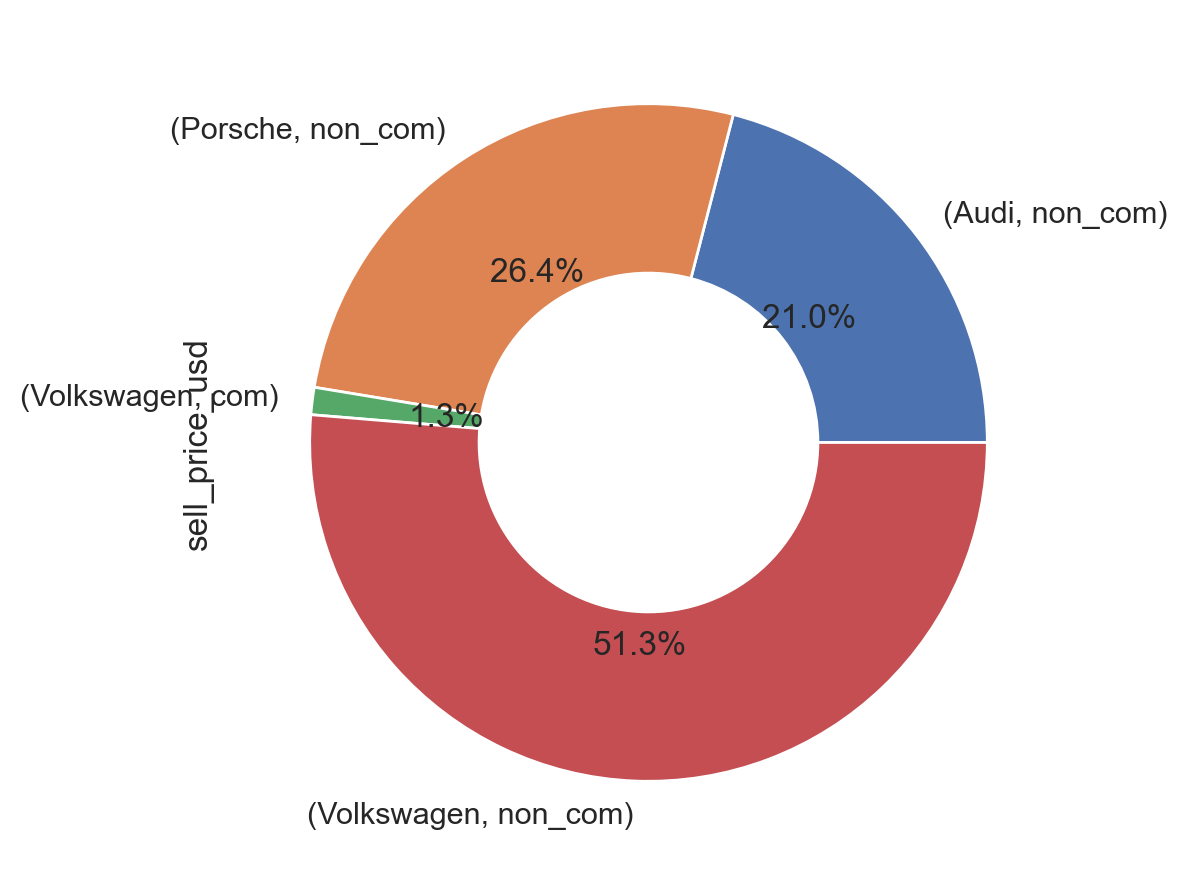

In [101]:
data_pivot = data_mercur.pivot_table(index=['brand','type_commercial'], values='sell_price_usd', aggfunc='sum', margins=True).drop('All')
                   #
data_pivot.plot( kind='pie',y='sell_price_usd',autopct='%1.1f%%', legend=False,wedgeprops=dict(width=0.5));  


Итак, Меркур Авто- мультибрендовый дилер, работает с тремя марками - Volkswagen,Audi и Porsche. Volkswagen суммарно занимает 52,6% выручки, доли Аudi и Porche близки и равны 21% и 26,4% соответсвенно.

Дилер продает как некоммерческие, так и коммерческие автомобили, но основная специализация безусловно аватомобили некоммерческие - они занимают 98,7% общих продаж.

И сразу бросаются в глаза три самые продаваемые модели - Volkswagen Polo, Volkswagen Tiguan и Porsche Cayenne.

Оценим теперь подробнее выручку - общую, срднюю и по маркам

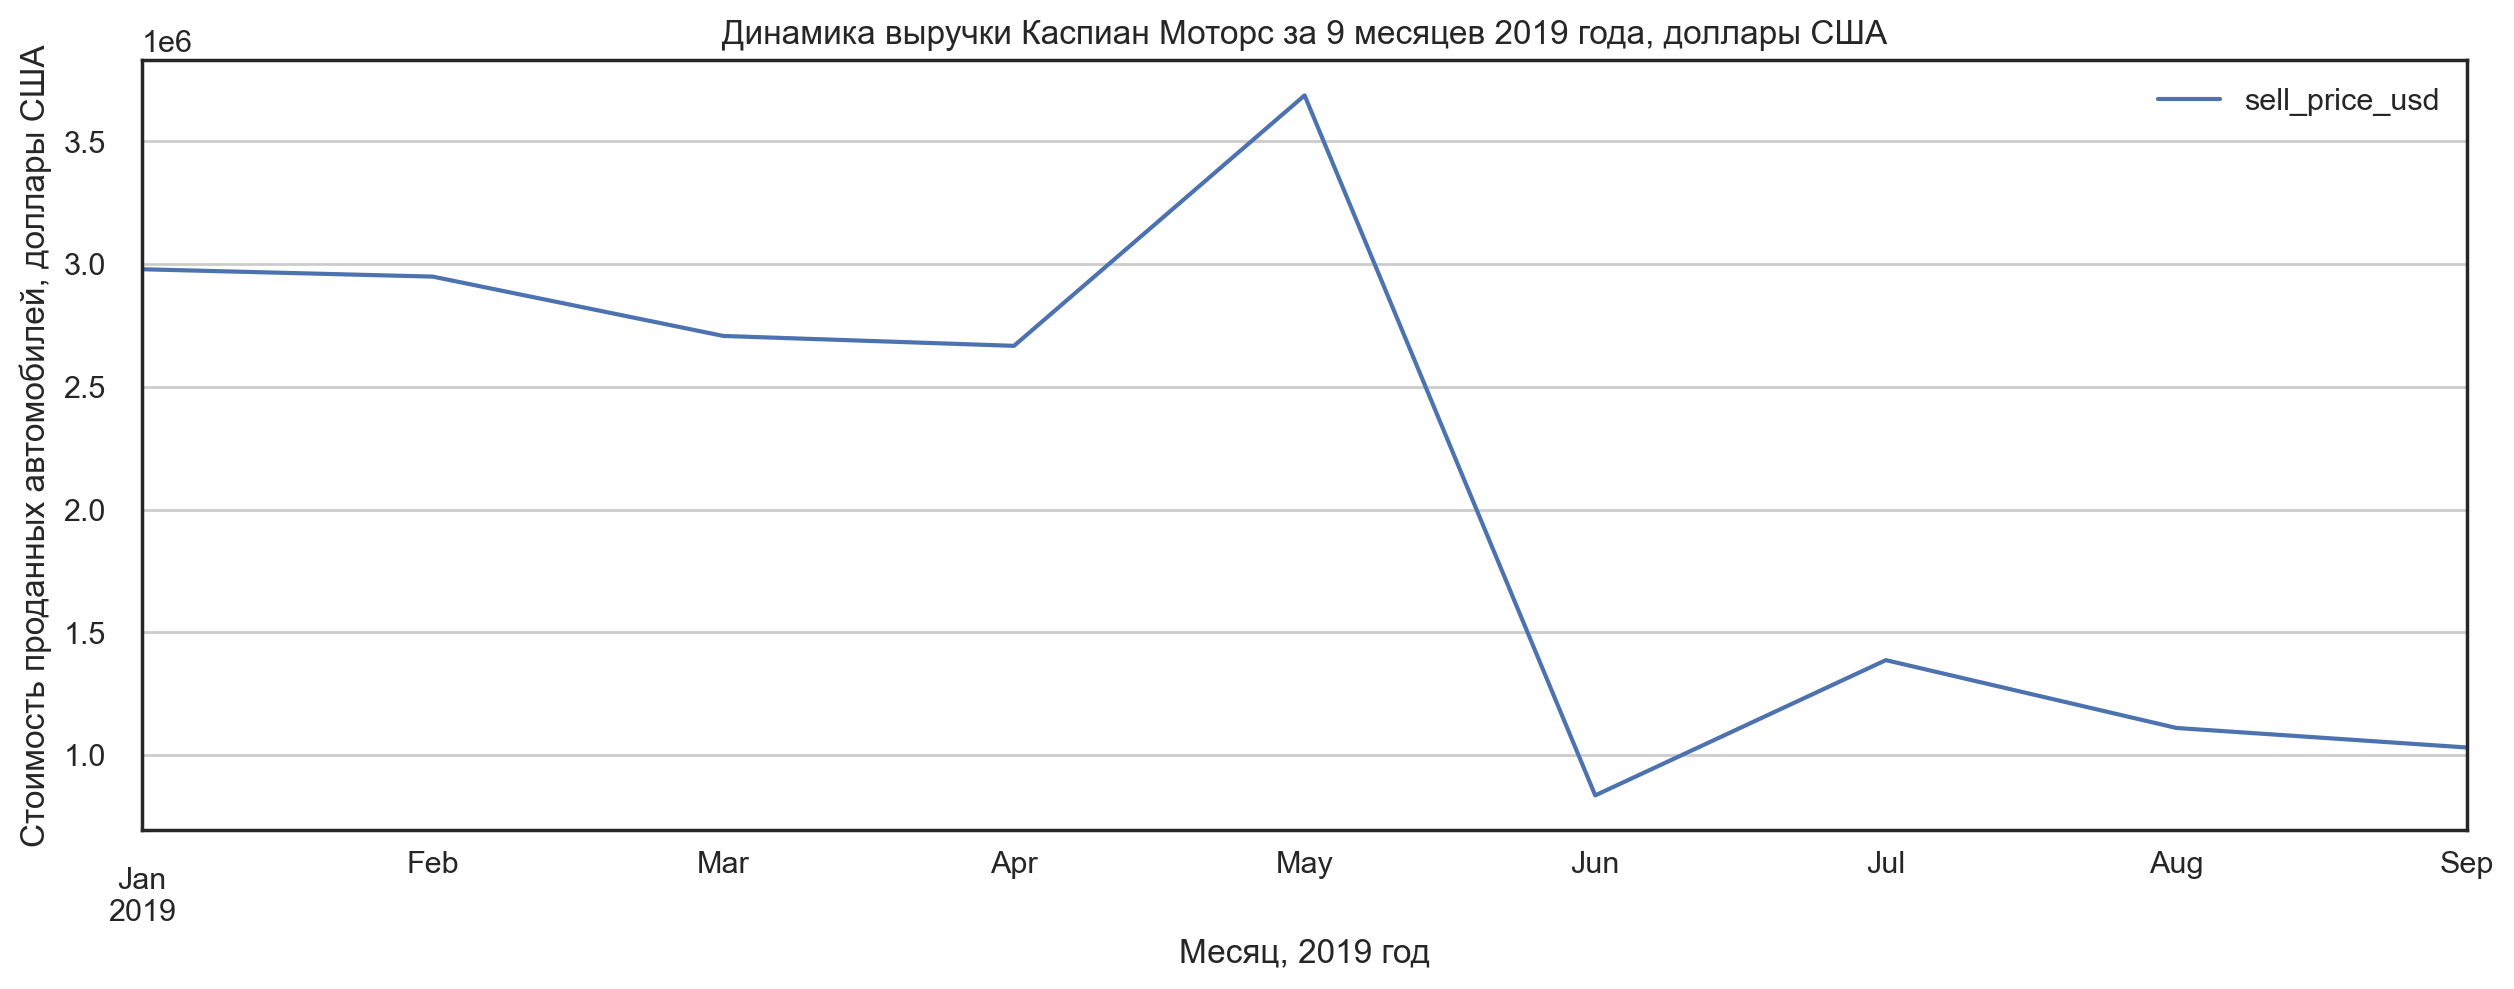

In [102]:
from matplotlib.ticker import StrMethodFormatter

data_mercur.groupby(['month'])[['sell_price_usd' ]].sum().plot(figsize=(15, 5), grid=True )  # подсчёт уникальных значений

plt.xlabel('Месяц, 2019 год')
plt.ylabel('Стоимость проданных автомобилей, доллары США')
plt.title('Динамика выручки Каспиан Моторс за 9 месяцев 2019 года, доллары США'); 




А вот на графике выручки за 9 месяцев есть нечто тревожное - если в начале года выручка росла, достигнув пика более чем в 3,5 млн. долларов США в мае, то потом в июне она резко упала - и с небольшим всплеском в июле так и колеблется в районе 1,5 млн. долларов США в месяц. Падение больше чем в три раза - посмотрим, сто происходило с продаваемыми моделями

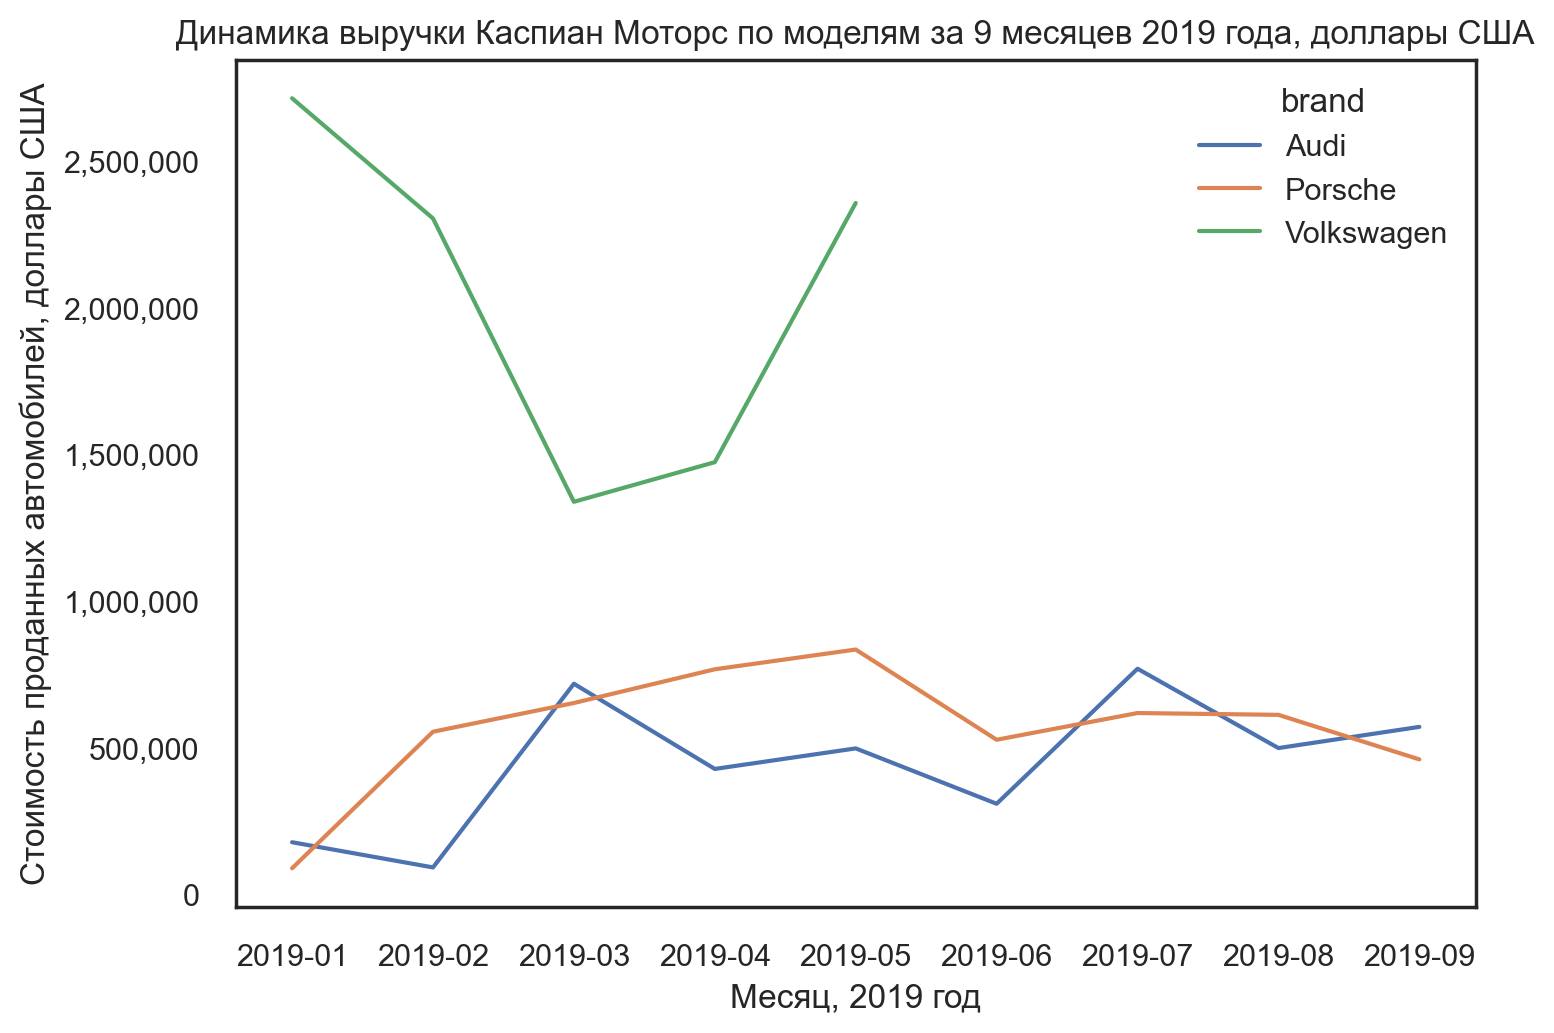

In [103]:
data_pivot = data_mercur.pivot_table(index=['month'], 
                                     columns='brand', 
                                     values='sell_price_usd',
                                     aggfunc='sum', margins=True).drop('All', axis=1).drop('All')


data_pivot.plot()

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Месяц, 2019 год')
plt.ylabel('Стоимость проданных автомобилей, доллары США')
plt.title('Динамика выручки Каспиан Моторс по моделям за 9 месяцев 2019 года, доллары США')
plt.show()  

Похоже, проблема с маркой Volkswagen - первые пять месяцев она давала большую часть выручки, в мае ее продажи полностью прекратились. 

Можно предположить несколько причин этой ситуации,  том числе возможно импортер Volkswagen с июня начал продажи напрямую, или закончился лимит на продажи автомобилей этой марки - правильнее всего было бы запросить информацию у менеджмента Мерукр Авто.



В каких же регионах работает Меркур Авто? 

In [104]:
data_pivot = data_mercur.pivot_table(index=['state'], 
                                     columns='brand', 
                                     values='sell_price_usd', 
                                     aggfunc='sum', margins=True).sort_values('All', ascending=True).drop('All', axis=1).drop('All')


                                                                                                                                             

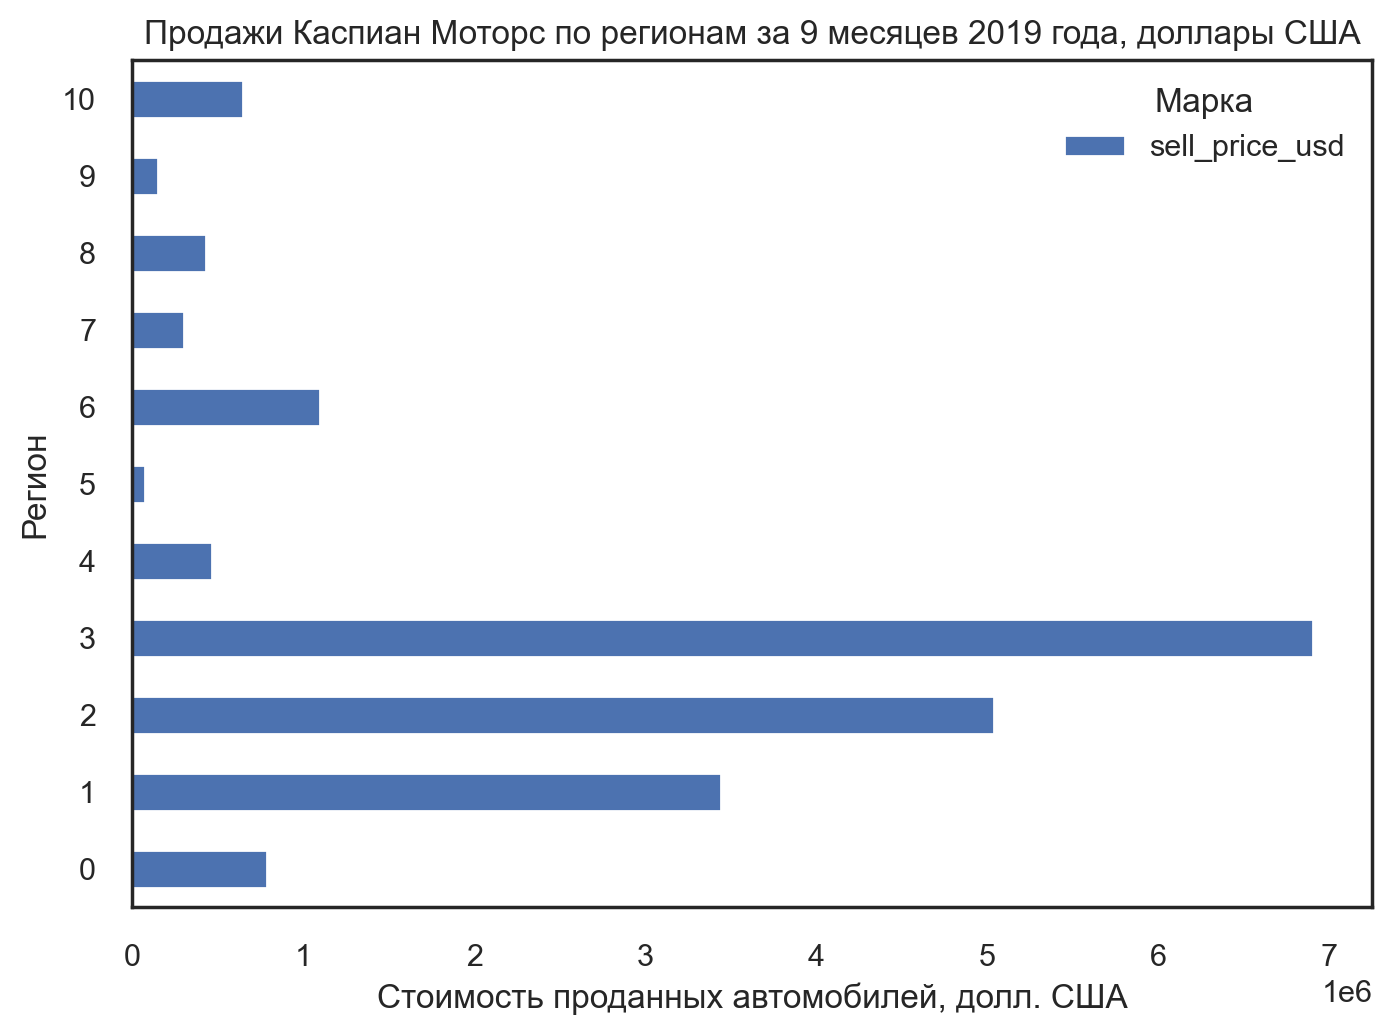

In [108]:
data_pivot.plot(kind='barh', stacked=True)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Продажи Каспиан Моторс по регионам за 9 месяцев 2019 года, доллары США', fontsize=12)
plt.xlabel('Стоимость проданных автомобилей, долл. США')
plt.ylabel('Регион')
plt.legend(title='Марка');
plt.show();

Меркур авто продает автомобили в шести регионах, подавляющее большинство , как и остальные дилеры, - в Алматыи и  Нурсултане. В этих городах продаются все три марки, с которыми работает дилер.

В Западно-Казахстанской, Карагандинской и Атырауской области Меркур Авто продавал только автомобили Volkswagen.

Интересно, какое количсетво автосалонов у дилера по регионам.

In [109]:
data_pivot = data_mercur.pivot_table(index=['state'], 
                                     #columns='dealer', 
                                     values='dealer', 
                                     aggfunc='nunique', margins=True).sort_values('dealer', ascending=False).drop('All')
data_pivot

,dealer
state,
Г.АЛМАТЫ,2
Г.НУР-СУЛТАН,2
АТЫРАУСКАЯ ОБЛАСТЬ,1
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1
КАРАГАНДИНСКАЯ ОБЛАСТЬ,1
КОСТАНАЙСКАЯ ОБЛАСТЬ,1


В большинстве регионов у Меркур Авто тоьлко один автосалон, только в двух ключевых городах -Алматы и Нур-Султане их по два.

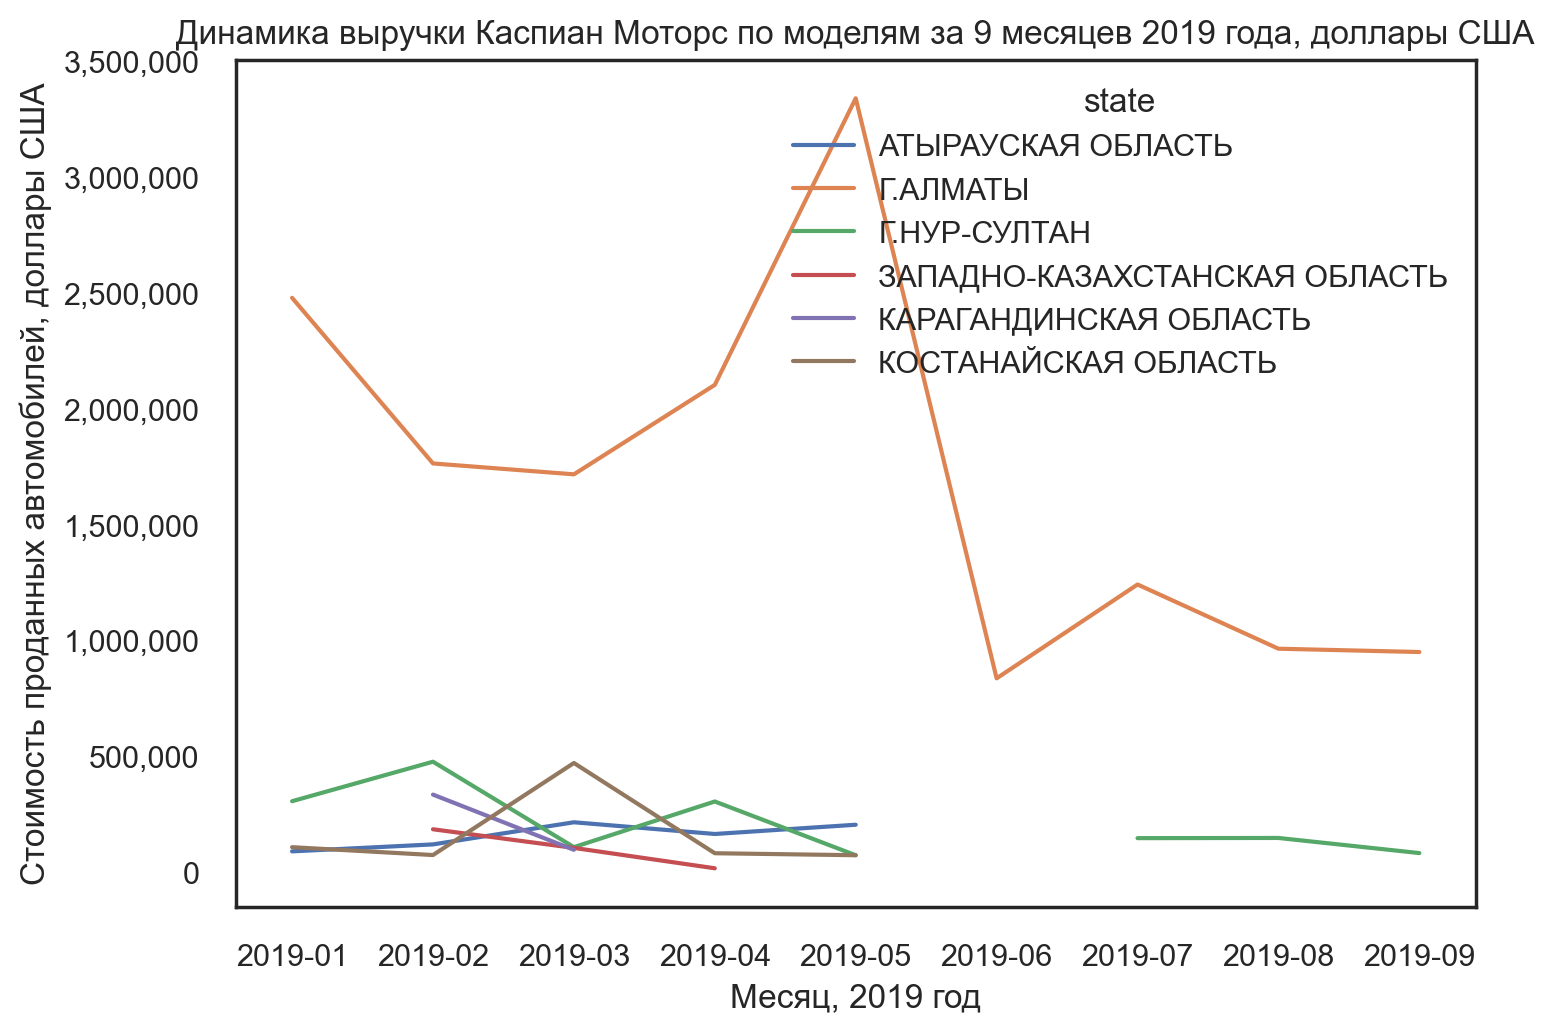

In [110]:
data_pivot = data_mercur.pivot_table(index=['month'], 
                                     columns='state', 
                                     values='sell_price_usd',
                                     aggfunc='sum', margins=True).drop('All', axis=1).drop('All')


data_pivot.plot()

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Месяц, 2019 год')
plt.ylabel('Стоимость проданных автомобилей, доллары США')
plt.title('Динамика выручки Каспиан Моторс по моделям за 9 месяцев 2019 года, доллары США')
plt.show() 

Ситуация выглядит так, будто Меркур Авто  с июня перестал продавать автомобили через автосалоны в  Западно-Казахстанской, Карагандинской и Атырауской областях. 
Непонятны причины, как и с прекращением продаж Volkwagen, так и с судьбой автосалонов и регионов - дилер ушёл из трёх регионов навсегда?  
Что происходит с автосалонами во второй половине 2019 - они закрыты, переданы другому дилеру, или это неточности в данных? 


Вообще все три марки на которых специализируется Меркур Авто Volkswagen,Audi и Porsche,  принадлежат одному  автоконцерну VAG (https://autosoda.ru/vag-grupp/). Такая специализация на амвтомобилях одного концерна с одной стороны может гарантировать эксклюзивные цены, с другой - привсти к большой зависимосьти от решений VAG - как это было с прекращением продаж Volkswagen.





## Выводы и рекомендации

Компания Меркур Авто входит в топ-10 компаний по объёму продажи автомобилей в Казахстане за 9 месяцев 2019 года.

Меркур Авто специализируется на продаже  автомобилей трех марок - Volkswagen,Audi и Porsche, в основном продаёт некоммерческие автомобили, но в ассортименте есть и две коммерческие модели Volkswagen. Volkswagen суммарно занимает 52,6% выручки, доли Аudi и Porche близки и равны 21% и 26,4% соответственно.

Меркур Авто работает в 6 регионах Казахстана. По два автосалона работают у компании в Алмате и Нур-Султане - эти же области дают большую часть выручки.  По одному автосалону - в Атырауской, Западно-Казахстанской , Каргадинской и Костанайской областях, но доля их в продажах незначительна.

Анализ ежемесячных продаж показал, что после июня 2019 года компания прекратила проджаи всех моделей Volkswagen, после чего ежемесячная  выручка Меркур Авто упала с пиковых 3,5 млн. доларов США до 1,5 млн. долл США, и к конце сентября так и не вернулась к обычным значениям.

Главная причина такой ситуации - полное прекращение продаж занимающих большую часть выручки моделей Volkswagen. Причин ситуации может быть несколько - от исчерпания лимитов на продажи до отказа со стороны импортера, и для прояснения ситуации в первую очередь хотелось бы получить пояснения менеджмента Меркур Авто. От позиции руководства компании будет зависеть и дальнейшее направление маркетингового исследования - например, в чем были причины прекращения продаж Volkswagen, планируется ли их возобновление, как руководство отностится к возможности расширения числа марок как к  возможной точке роста. 

Среди возможных путей развития можно так же назвать усиление присутствия в областях с самыми высоким зарплатами  - Атыраускую и Мангистауские области, но это, как и расширение числа марок, потребует дополнительного исследования.




